# Minimize Lender's Risk - Cermati.com
For most financial institutions, such as banks and multi-finance companies, their main source of income is coming from their lending activities. 

### Problems
By engaging in this activity, it means that lenders are exposed to the potential risk, where debtors stop repaying their loans, causing losses to the lenders. To mitigate that loss, lenders are expected to appropriately choose who are qualified for a loan, at what rate, and at what amount. 

### Goals
In this question, you are tasked to help the troubled lenders with this problem by creating a model that can help them make their decision.
> *The lenders also provided the following dataset that you can use, which are attached in DS1.zip in the email (columns description is provided in the columns_description.csv, unnamed columns in the given dataset can be dropped).*



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# 1) Preparation of Dataset
Importing essential library for analyzing and visualization purposes. Since the *train.csv* and *test.csv* dataset are provided with the same number of features, here I choose to analyze and train the model from *train.csv* alone.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install sidetable
import sidetable

import warnings
warnings.filterwarnings('ignore')

In [ ]:
app = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Cermati.com/app_train.csv')
app.columns = [i.lower() for i in app.columns]                                            # lowercasing for workability
app = app.drop(['unnamed: 0'], axis = 1)                                                  # dropping 'unnamed' column as has been told in the "Data Scientist Test.docx"

print(f"This dataset contains {app.shape[0]} rows and {app.shape[1]} columns.")

This dataset contains 61503 rows and 23 columns.


In [ ]:
# Showing 5 rows of data to see what the dataset looks like.
app.head()

,ln_id,target,contract_type,gender,num_children,income,approved_credit,annuity,price,income_type,education,family_status,housing_type,days_age,days_work,days_registration,days_id_change,weekdays_apply,hour_apply,organization_type,ext_score_1,ext_score_2,ext_score_3
0,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,Secondary / secondary special,Married,With parents,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,Higher education,Married,House / apartment,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595


In [ ]:
app.info()

# we see that every column has correct dtype.
# so we won't handle the mislead dtype anymore in the future.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61503 entries, 0 to 61502
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ln_id              61503 non-null  int64  
 1   target             61503 non-null  int64  
 2   contract_type      61503 non-null  object 
 3   gender             61503 non-null  object 
 4   num_children       61503 non-null  int64  
 5   income             61503 non-null  float64
 6   approved_credit    61503 non-null  float64
 7   annuity            61502 non-null  float64
 8   price              61441 non-null  float64
 9   income_type        61503 non-null  object 
 10  education          61503 non-null  object 
 11  family_status      61503 non-null  object 
 12  housing_type       61503 non-null  object 
 13  days_age           61503 non-null  int64  
 14  days_work          61503 non-null  int64  
 15  days_registration  61503 non-null  float64
 16  days_id_change     615

# 2) Explaination of Each Feature

In [ ]:
# To undersand every column,
# we gather the data from 'columns_description.csv'

desc = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Cermati.com/columns_description.csv')
desc = desc.applymap(lambda x : x.strip())                      # strip every strings to remove leading and trailing whitespaces
desc['Columns'] = desc['Columns'].apply(lambda x: x.lower())    # lowercasing every column to match with dataset's columns
desc.set_index('Columns', inplace = True)                       # set index by 'columns' to before converting into dictionary type

desc = desc.iloc[:23]                                           # Description of applicant loan's training set is from index 0 to 22
desc = desc['Description'].to_dict()                            # converting dataframe into dictionary

In [ ]:
desc

{'annuity': 'Loan annuity (amount that must be paid monthly)',
 'approved_credit': 'Approved credit amount of the loan',
 'contract_type': 'Identification if loan is cash or revolving',
 'days_age': "Client's age in days at the time of application",
 'days_id_change': 'How many days before the application did client change the identity document with which he applied for the loan',
 'days_registration': 'How many days before the application did client change his registration',
 'days_work': 'How many days before the application the person started current job',
 'education': 'The client highest education',
 'ext_score_1': 'Normalized score from external data source',
 'ext_score_2': 'Normalized score from external data source',
 'ext_score_3': 'Normalized score from external data source',
 'family_status': 'Family status of the client',
 'gender': 'Gender of the client',
 'hour_apply': 'Approximately at what hour did the client apply for the loan',
 'housing_type': 'What is the housing s

In [ ]:
desc_app_data = []                                            # empty list to collect every value for each of column's information
for name in app.columns:                                      # using for loop to append information into previous empty list
  desc_app_data.append(
      [
       name,                                                  # name of column
       app[name].dtypes,                                      # dtype of column
       app[name].isnull().sum(),                              # number of null value of column
       round(app[name].isnull().sum()/len(app)*100, 2),       # percentage of null value of column
       app[name].nunique(),                                   # number of unique value of column
       app[name].unique(),                                    # unique values of column
       desc[name]                                             # description of column from previous cell.
       ]
  )

# make a dataframe for visualization purposes
column_desc = pd.DataFrame(desc_app_data, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique','Description'])

In [ ]:
column_desc

,Column,Dtype,Null,Null (%),nUnique,Unique,Description
0,ln_id,int64,0,0.00,61503,"[333538, 406644, 259130, 411997, 241559, 29653...",Loan ID
1,target,int64,0,0.00,2,"[0, 1]",Target variable (1 - client with late payment ...
2,contract_type,object,0,0.00,2,"[Revolving loans, Cash loans]",Identification if loan is cash or revolving
3,gender,object,0,0.00,2,"[F, M]",Gender of the client
4,num_children,int64,0,0.00,10,"[1, 0, 2, 3, 4, 6, 5, 8, 7, 9]",Number of children the client has
5,income,float64,0,0.00,861,"[67500.0, 202500.0, 180000.0, 225000.0, 135000...",Monthly income of the client
6,approved_credit,float64,0,0.00,3562,"[202500.0, 976711.5, 407520.0, 808650.0, 18000...",Approved credit amount of the loan
7,annuity,float64,1,0.00,9374,"[10125.0, 49869.0, 25060.5, 26086.5, 9000.0, 3...",Loan annuity (amount that must be paid monthly)
8,price,float64,62,0.10,541,"[202500.0, 873000.0, 360000.0, 675000.0, 18000...",For consumer loans it is the price of the good...
9,income_type,object,0,0.00,7,"[Working, Commercial associate, Pensioner, Sta...","Clients income type (businessman, working, mat..."


In [ ]:
print("Columns which have null values are:".upper())

for i in range(len(column_desc)):
  if column_desc['Null'][i] > 0:
    print(f"- {column_desc['Column'][i]} has {column_desc['Null (%)'][i]}% values.")

COLUMNS WHICH HAVE NULL VALUES ARE:
- annuity has 0.0% values.
- price has 0.1% values.
- ext_score_1 has 56.66% values.
- ext_score_2 has 0.22% values.
- ext_score_3 has 19.9% values.


# 3) Handling Missing Value
There are some columns which have null values:
- annuity
- price
- ext_score_1
- ext_score_2
- ext_score_3

## annuity

In [ ]:
app.describe()['annuity'].to_frame().T

# since this column has outliers like from Q3 = 34,596 to max range = 258,025
# we'll impute the null values with median (Q2).

,count,mean,std,min,25%,50%,75%,max
annuity,61502.0,27083.323315,14470.508291,2164.5,16506.0,24853.5,34596.0,258025.5


In [ ]:
print(f"There are {app['annuity'].isnull().sum()} null value in 'annuity' column.")
print('='*15, " ++ Imputing ++ ", "="*15)

app['annuity'] = app['annuity'].fillna(app['annuity'].median())
print(f"There are {app['annuity'].isnull().sum()} null value in 'annuity' column.")

There are 1 null value in 'annuity' column.
===============  ++ Imputing ++  ===============
There are 0 null value in 'annuity' column.


## price

In [ ]:
app.describe()['price'].to_frame().T

# since this column has outlier,
# we'll impute the null values with median (Q2) again.

,count,mean,std,min,25%,50%,75%,max
price,61441.0,536903.319811,368574.224006,45000.0,238500.0,450000.0,679500.0,4050000.0


In [ ]:
print(f"There are {app['price'].isnull().sum()} null value in 'price' column.")
print('='*15, " ++ Imputing ++ ", "="*15)

app['price'] = app['price'].fillna(app['price'].median())
print(f"There are {app['price'].isnull().sum()} null value in 'price' column.")

There are 62 null value in 'price' column.
===============  ++ Imputing ++  ===============
There are 0 null value in 'price' column.


## ext_score_2

In [ ]:
app.describe()['ext_score_2'].to_frame().T

# we'll impute the null values with the average value of this column.

,count,mean,std,min,25%,50%,75%,max
ext_score_2,61369.0,0.514138,0.191209,8.173617e-08,0.392692,0.565881,0.663788,0.855


In [ ]:
print(f"There are {app['ext_score_2'].isnull().sum()} null value in 'ext_score_2' column.")
print('='*15, " ++ Imputing ++ ", "="*15)

app['ext_score_2'] = app['ext_score_2'].fillna(app['ext_score_2'].mean())
print(f"There are {app['ext_score_2'].isnull().sum()} null value in 'ext_score_2' column.")

There are 134 null value in 'ext_score_2' column.
===============  ++ Imputing ++  ===============
There are 0 null value in 'ext_score_2' column.


## ext_score_1 and ext_score_3

In [ ]:
# since 'ext_score_1' and 'ext_score_3' have many nulls and could be represented by 'ext_score_2' too, 
# we drop these columns for good.

app.drop(['ext_score_1', 'ext_score_3'], axis = 1, inplace = True)

In [ ]:
app.isnull().sum()

# our dataset has been cleaned from missing values.

ln_id                0
target               0
contract_type        0
gender               0
num_children         0
income               0
approved_credit      0
annuity              0
price                0
income_type          0
education            0
family_status        0
housing_type         0
days_age             0
days_work            0
days_registration    0
days_id_change       0
weekdays_apply       0
hour_apply           0
organization_type    0
ext_score_2          0
dtype: int64

# 4) Outliers

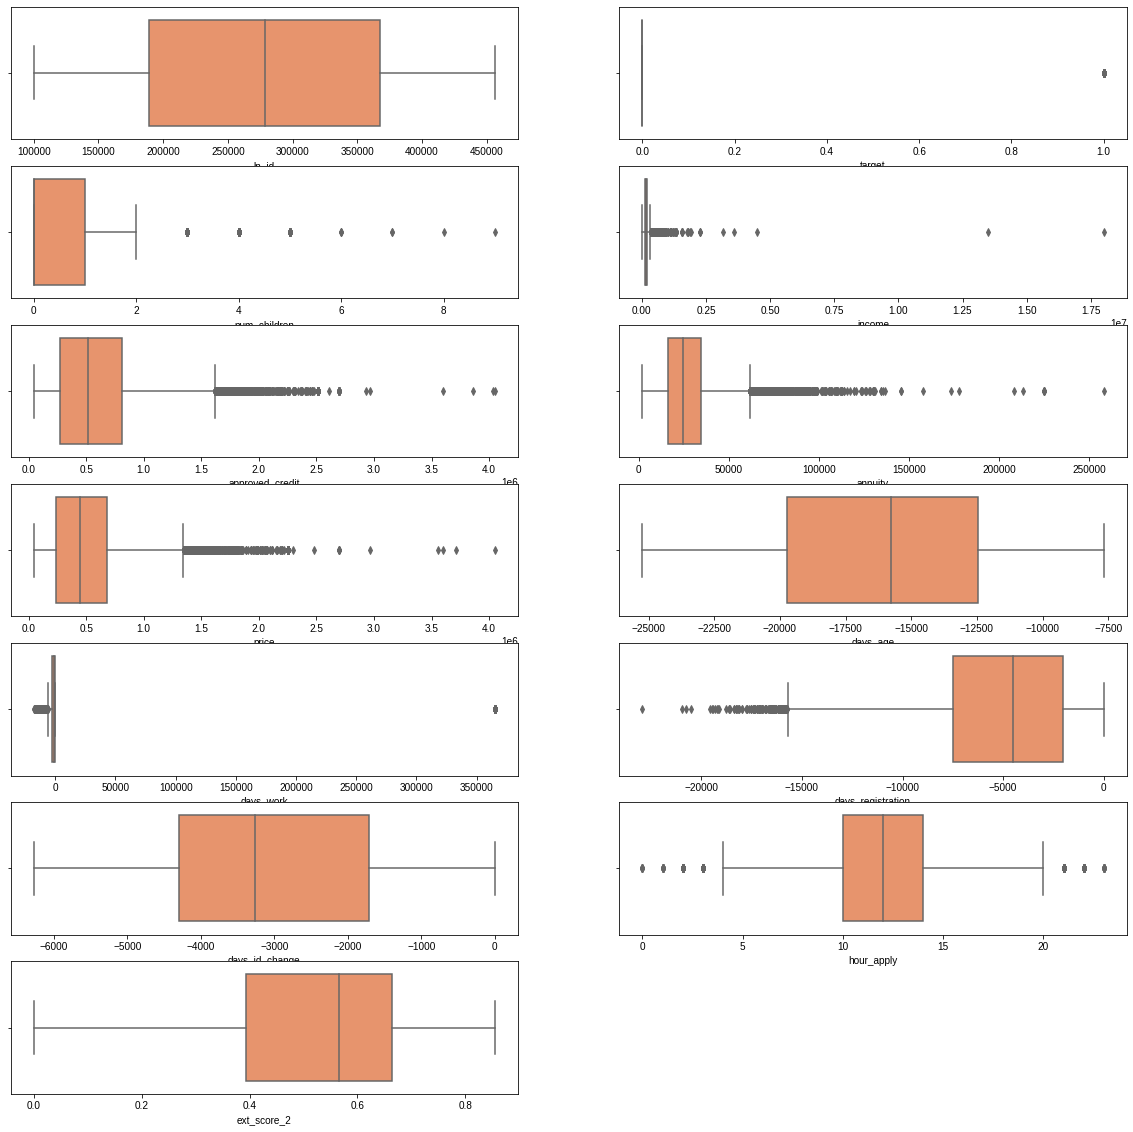

In [ ]:
# Check outliers first for every numerical column

plt.figure(figsize = (20,20))

n = 1
for name in app.describe().columns:
  plt.subplot(7,2,n)
  sns.boxplot(app[name], palette = 'OrRd')
  n += 1

plt.style.use('seaborn-whitegrid')
plt.show()

## num_children

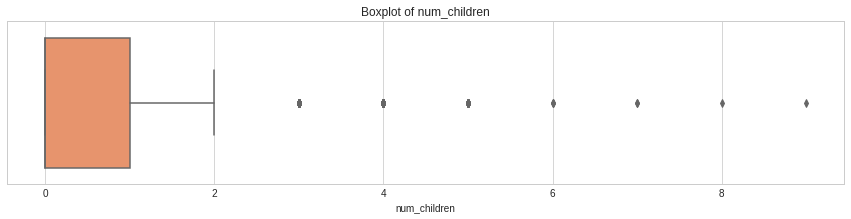

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'num_children', data = app, palette = 'OrRd')
plt.title('Boxplot of num_children')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_nc = app.describe()['num_children']['25%']
Q3_nc = app.describe()['num_children']['75%']
IQR_nc = Q3_nc - Q1_nc
UpFence_nc = Q3_nc + (1.5 * IQR_nc)
LoFence_nc = Q1_nc - (1.5 * IQR_nc)

out_nc = (app['num_children'] < LoFence_nc) | (app['num_children'] > UpFence_nc)
app[out_nc].sort_values(by = 'num_children')

,ln_id,target,contract_type,gender,num_children,income,approved_credit,annuity,price,income_type,education,family_status,housing_type,days_age,days_work,days_registration,days_id_change,weekdays_apply,hour_apply,organization_type,ext_score_2
55,313254,0,Revolving loans,F,3,81000.0,180000.0,9000.0,180000.0,Working,Secondary / secondary special,Married,With parents,-14670,-426,-4554.0,-3987,SUNDAY,13,Business Entity Type 3,0.704288
38702,267786,0,Cash loans,F,3,63000.0,111384.0,9058.5,90000.0,Working,Secondary / secondary special,Married,House / apartment,-11466,-1658,-4227.0,-595,THURSDAY,11,Self-employed,0.116300
38800,129702,0,Cash loans,M,3,63000.0,829584.0,29925.0,630000.0,Working,Higher education,Married,House / apartment,-15940,-6221,-2822.0,-4638,WEDNESDAY,14,Other,0.355682
39027,309939,0,Cash loans,F,3,121500.0,765000.0,24678.0,765000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12496,-2762,-2268.0,-3597,MONDAY,12,Self-employed,0.693799
39176,312073,0,Cash loans,M,3,126000.0,900000.0,29164.5,900000.0,Working,Secondary / secondary special,Separated,House / apartment,-11550,-877,-5249.0,-4074,TUESDAY,17,Industry: type 1,0.478847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,317544,1,Cash loans,M,6,202500.0,229230.0,18238.5,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19250,-1874,-4916.0,-2788,THURSDAY,14,Business Entity Type 3,0.594859
52895,355015,0,Cash loans,F,7,157500.0,450000.0,21888.0,450000.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,-1208.0,-4674,FRIDAY,13,School,0.567921
27700,453499,0,Cash loans,F,7,112500.0,143910.0,15399.0,135000.0,Working,Secondary / secondary special,Widow,House / apartment,-10940,-1405,-4766.0,-3565,SATURDAY,15,Business Entity Type 3,0.479758
6257,278853,0,Cash loans,F,8,103500.0,239850.0,23719.5,225000.0,Working,Secondary / secondary special,Married,House / apartment,-11167,-3543,-3017.0,-3431,WEDNESDAY,12,Self-employed,0.452556


In [ ]:
print(f"Outliers of 'num_children' column is above {UpFence_nc} .")
print(f"Total data which counted as an outliers is {len(app[out_nc].sort_values(by = 'num_children'))} of {len(app)} rows.")
print(f"It's{(len(app[out_nc]) ) / len(app) * 100 : .2f}% from the entire rows.")

Outliers of 'num_children' column is above 2.5 .
Total data which counted as an outliers is 841 of 61503 rows.
It's 1.37% from the entire rows.


## income

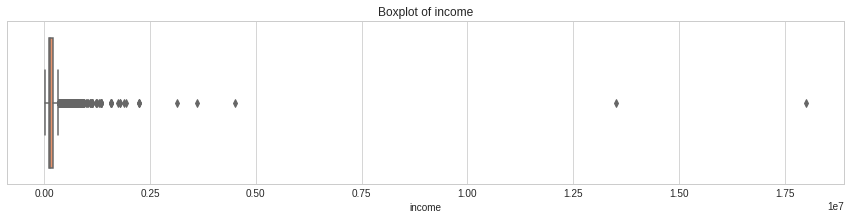

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'income', data = app, palette = 'OrRd')
plt.title('Boxplot of income')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_in = app.describe()['income']['25%']
Q3_in = app.describe()['income']['75%']
IQR_in = Q3_in - Q1_in
UpFence_in = Q3_in + (1.5 * IQR_in)
LoFence_in = Q1_in - (1.5 * IQR_in)

out_in = (app['income'] < LoFence_in) | (app['income'] > UpFence_in)
app[out_in].sort_values(by = 'income')

,ln_id,target,contract_type,gender,num_children,income,approved_credit,annuity,price,income_type,education,family_status,housing_type,days_age,days_work,days_registration,days_id_change,weekdays_apply,hour_apply,organization_type,ext_score_2
46534,141002,0,Revolving loans,M,0,339282.0,540000.0,27000.0,540000.0,Working,Higher education,Married,House / apartment,-14739,-734,-7826.0,-4074,FRIDAY,10,Security,0.666996
11413,338939,0,Cash loans,M,0,342000.0,710640.0,84465.0,675000.0,Working,Secondary / secondary special,Married,House / apartment,-17749,-2813,-9375.0,-1266,TUESDAY,10,Self-employed,0.743399
25906,153304,0,Cash loans,F,0,342000.0,1800000.0,47614.5,1800000.0,State servant,Academic degree,Married,House / apartment,-17565,-6854,-1656.0,-1084,TUESDAY,11,University,0.748834
5676,187613,0,Revolving loans,F,0,342000.0,765000.0,38250.0,765000.0,Commercial associate,Higher education,Single / not married,House / apartment,-9534,-1804,-3897.0,-2216,TUESDAY,19,Business Entity Type 1,0.669164
37827,401441,0,Cash loans,F,0,342000.0,373140.0,39721.5,337500.0,Working,Higher education,Married,House / apartment,-17554,-10206,-1061.0,-1070,MONDAY,9,Transport: type 2,0.506933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4346,217276,0,Revolving loans,M,0,3150000.0,2250000.0,225000.0,2250000.0,Commercial associate,Higher education,Married,House / apartment,-13386,-5564,-4028.0,-1031,FRIDAY,13,Trade: type 2,0.551281
20370,429258,0,Cash loans,M,0,3600000.0,1113840.0,44302.5,900000.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,-14897,-311,-4872.0,-2190,FRIDAY,17,Self-employed,0.526475
39217,317748,0,Cash loans,M,0,4500000.0,835380.0,42651.0,675000.0,Working,Secondary / secondary special,Married,House / apartment,-18715,-3331,-8877.0,-2104,FRIDAY,13,Construction,0.748822
55124,385674,0,Cash loans,M,0,13500000.0,1400503.5,130945.5,1368000.0,Commercial associate,Higher education,Married,House / apartment,-13551,-280,-3953.0,-4972,SUNDAY,12,Business Entity Type 3,0.713507


In [ ]:
print(f"Outliers of 'income' column is above {UpFence_in} .")
print(f"Total data which counted as an outliers is {len(app[out_in].sort_values(by = 'income'))} of {len(app)} rows.")
print(f"It's{(len(app[out_in]) ) / len(app) * 100 : .2f}% from the entire rows.")

Outliers of 'income' column is above 337500.0 .
Total data which counted as an outliers is 2853 of 61503 rows.
It's 4.64% from the entire rows.


## approved_credit

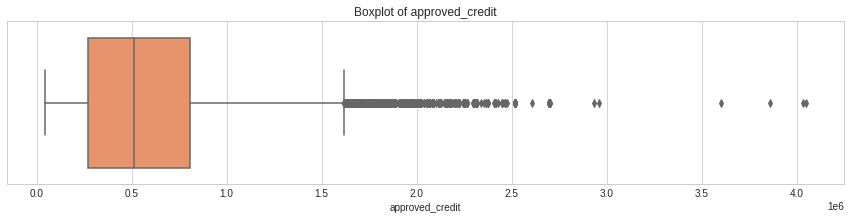

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'approved_credit', data = app, palette = 'OrRd')
plt.title('Boxplot of approved_credit')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_ac = app.describe()['approved_credit']['25%']
Q3_ac = app.describe()['approved_credit']['75%']
IQR_ac = Q3_ac - Q1_ac
UpFence_ac = Q3_ac + (1.5 * IQR_ac)
LoFence_ac = Q1_ac - (1.5 * IQR_ac)

out_ac = (app['approved_credit'] < LoFence_ac) | (app['approved_credit'] > UpFence_ac)
app[out_ac].sort_values(by = 'approved_credit')

,ln_id,target,contract_type,gender,num_children,income,approved_credit,annuity,price,income_type,education,family_status,housing_type,days_age,days_work,days_registration,days_id_change,weekdays_apply,hour_apply,organization_type,ext_score_2
19303,352392,0,Cash loans,F,0,112500.0,1618767.0,58275.0,1336500.0,Working,Higher education,Married,House / apartment,-18188,-5111,-6806.0,-1745,MONDAY,10,Hotel,0.643690
54927,293263,0,Cash loans,F,0,202500.0,1620000.0,49117.5,1620000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-21894,-5844,-4484.0,-1434,MONDAY,11,Government,0.601870
55068,150281,0,Cash loans,M,0,292500.0,1620000.0,44550.0,1620000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17205,-5901,-728.0,-737,SATURDAY,12,Industry: type 3,0.691509
48016,240529,0,Cash loans,M,0,337500.0,1620000.0,47497.5,1620000.0,Working,Higher education,Married,House / apartment,-13330,-2510,-2243.0,-2541,FRIDAY,17,Business Entity Type 3,0.669145
25178,160845,0,Cash loans,F,0,225000.0,1620000.0,60034.5,1620000.0,Commercial associate,Higher education,Single / not married,House / apartment,-13941,-2988,-2384.0,-4784,WEDNESDAY,11,Other,0.549495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28264,110403,1,Cash loans,M,0,315000.0,2961000.0,105511.5,2961000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-22484,-1445,-4886.0,-5038,TUESDAY,11,Industry: type 9,0.546223
50767,162494,0,Cash loans,M,0,900450.0,3600000.0,91008.0,3600000.0,Commercial associate,Higher education,Single / not married,House / apartment,-13582,-1250,-5925.0,-4461,WEDNESDAY,18,Business Entity Type 3,0.694477
3598,238431,0,Cash loans,F,0,292050.0,3860019.0,97578.0,3555000.0,Commercial associate,Higher education,Married,House / apartment,-14187,-1596,-6278.0,-4883,FRIDAY,10,Business Entity Type 3,0.578278
509,210956,0,Cash loans,M,0,430650.0,4031032.5,102033.0,3712500.0,Working,Higher education,Single / not married,House / apartment,-16475,-299,-41.0,-24,MONDAY,12,Business Entity Type 3,0.447749


In [ ]:
print(f"Outliers of 'approved_credit' column is above {UpFence_ac} .")
print(f"Total data which counted as an outliers is {len(app[out_ac].sort_values(by = 'approved_credit'))} of {len(app)} rows.")
print(f"It's{(len(app[out_ac]) ) / len(app) * 100 : .2f}% from the entire rows.")

Outliers of 'approved_credit' column is above 1616625.0 .
Total data which counted as an outliers is 1302 of 61503 rows.
It's 2.12% from the entire rows.


## annuity

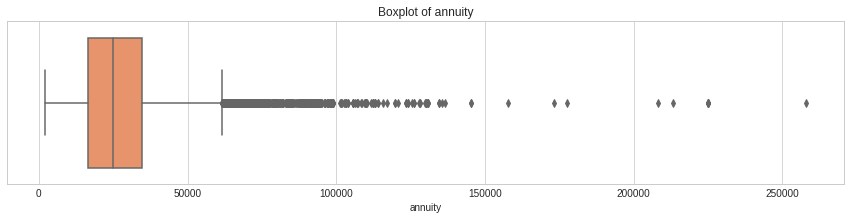

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'annuity', data = app, palette = 'OrRd')
plt.title('Boxplot of annuity')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_an = app.describe()['annuity']['25%']
Q3_an = app.describe()['annuity']['75%']
IQR_an = Q3_an - Q1_an
UpFence_an = Q3_an + (1.5 * IQR_an)
LoFence_an = Q1_an - (1.5 * IQR_an)

out_an = (app['annuity'] < LoFence_an) | (app['annuity'] > UpFence_an)
app[out_an].sort_values(by = 'annuity')

,ln_id,target,contract_type,gender,num_children,income,approved_credit,annuity,price,income_type,education,family_status,housing_type,days_age,days_work,days_registration,days_id_change,weekdays_apply,hour_apply,organization_type,ext_score_2
11412,229509,0,Cash loans,F,0,382500.0,1772352.0,61735.5,1530000.0,Working,Higher education,Single / not married,House / apartment,-22360,-189,-4419.0,-4381,WEDNESDAY,13,Business Entity Type 3,0.704229
4655,429154,0,Cash loans,M,1,292500.0,1574532.0,61740.0,1350000.0,Commercial associate,Higher education,Married,House / apartment,-14443,-3370,-4598.0,-4686,SATURDAY,10,Transport: type 4,0.693451
42100,280699,0,Cash loans,M,0,225000.0,1190340.0,61762.5,1125000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16211,-3225,-4165.0,-4038,TUESDAY,11,Trade: type 2,0.700751
42959,125826,0,Cash loans,M,0,360000.0,1190340.0,61762.5,1125000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-13646,-2321,-2238.0,-2299,FRIDAY,15,Business Entity Type 3,0.494092
40500,168602,0,Cash loans,M,0,157500.0,1190340.0,61762.5,1125000.0,Working,Secondary / secondary special,Married,House / apartment,-14018,-2193,-5507.0,-4670,WEDNESDAY,10,Self-employed,0.788234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51771,114122,0,Revolving loans,M,0,1080000.0,2250000.0,225000.0,2250000.0,Commercial associate,Higher education,Married,House / apartment,-15323,-6281,-2788.0,-4430,WEDNESDAY,19,Bank,0.750889
4346,217276,0,Revolving loans,M,0,3150000.0,2250000.0,225000.0,2250000.0,Commercial associate,Higher education,Married,House / apartment,-13386,-5564,-4028.0,-1031,FRIDAY,13,Trade: type 2,0.551281
40776,406901,0,Revolving loans,F,0,450000.0,2250000.0,225000.0,2250000.0,Pensioner,Higher education,Widow,House / apartment,-25229,365243,-10147.0,-4166,SATURDAY,15,NA1,0.651023
11760,127443,0,Revolving loans,M,0,675000.0,2250000.0,225000.0,2250000.0,Commercial associate,Higher education,Married,House / apartment,-21040,-2228,-3377.0,-4385,SATURDAY,14,Self-employed,0.569975


In [ ]:
print(f"Outliers of 'annuity' column is above {UpFence_an} .")
print(f"Total data which counted as an outliers is {len(app[out_an].sort_values(by = 'annuity'))} of {len(app)} rows.")
print(f"It's{(len(app[out_an]) ) / len(app) * 100 : .2f}% from the entire rows.")

Outliers of 'annuity' column is above 61731.0 .
Total data which counted as an outliers is 1504 of 61503 rows.
It's 2.45% from the entire rows.


## price

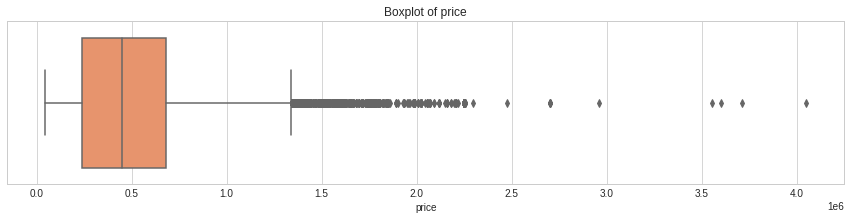

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'price', data = app, palette = 'OrRd')
plt.title('Boxplot of price')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_pr = app.describe()['price']['25%']
Q3_pr = app.describe()['price']['75%']
IQR_pr = Q3_pr - Q1_pr
UpFence_pr = Q3_pr + (1.5 * IQR_pr)
LoFence_pr = Q1_pr - (1.5 * IQR_pr)

out_pr = (app['price'] < LoFence_pr) | (app['price'] > UpFence_pr)
app[out_pr].sort_values(by = 'price')

,ln_id,target,contract_type,gender,num_children,income,approved_credit,annuity,price,income_type,education,family_status,housing_type,days_age,days_work,days_registration,days_id_change,weekdays_apply,hour_apply,organization_type,ext_score_2
42506,455167,0,Cash loans,M,0,360000.0,1345500.0,43533.0,1345500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-21011,-4240,-3751.0,-4472,TUESDAY,9,Self-employed,0.741379
36837,353183,0,Cash loans,F,0,225000.0,1345500.0,37129.5,1345500.0,Pensioner,Secondary / secondary special,Married,Municipal apartment,-19267,365243,-8198.0,-2815,THURSDAY,14,NA1,0.777009
59837,346439,1,Cash loans,F,0,211500.0,1462720.5,62104.5,1345500.0,Working,Secondary / secondary special,Married,House / apartment,-22323,-567,-830.0,-5289,SATURDAY,12,Self-employed,0.176981
8384,381523,0,Cash loans,F,0,270000.0,1345500.0,39339.0,1345500.0,Commercial associate,Higher education,Married,House / apartment,-14627,-112,-6596.0,-4715,SUNDAY,12,Business Entity Type 3,0.702399
36530,179833,0,Cash loans,F,0,270000.0,1345500.0,44595.0,1345500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14604,-2790,-4566.0,-4580,THURSDAY,12,Trade: type 7,0.642460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28264,110403,1,Cash loans,M,0,315000.0,2961000.0,105511.5,2961000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-22484,-1445,-4886.0,-5038,TUESDAY,11,Industry: type 9,0.546223
3598,238431,0,Cash loans,F,0,292050.0,3860019.0,97578.0,3555000.0,Commercial associate,Higher education,Married,House / apartment,-14187,-1596,-6278.0,-4883,FRIDAY,10,Business Entity Type 3,0.578278
50767,162494,0,Cash loans,M,0,900450.0,3600000.0,91008.0,3600000.0,Commercial associate,Higher education,Single / not married,House / apartment,-13582,-1250,-5925.0,-4461,WEDNESDAY,18,Business Entity Type 3,0.694477
509,210956,0,Cash loans,M,0,430650.0,4031032.5,102033.0,3712500.0,Working,Higher education,Single / not married,House / apartment,-16475,-299,-41.0,-24,MONDAY,12,Business Entity Type 3,0.447749


In [ ]:
print(f"Outliers of 'price' column is above {UpFence_pr} .")
print(f"Total data which counted as an outliers is {len(app[out_pr].sort_values(by = 'price'))} of {len(app)} rows.")
print(f"It's{(len(app[out_pr]) ) / len(app) * 100 : .2f}% from the entire rows.")

Outliers of 'price' column is above 1341000.0 .
Total data which counted as an outliers is 2941 of 61503 rows.
It's 4.78% from the entire rows.


## days_work

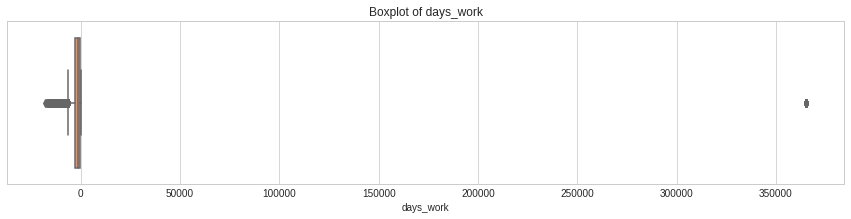

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'days_work', data = app, palette = 'OrRd')
plt.title('Boxplot of days_work')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_dw = app.describe()['days_work']['25%']
Q3_dw = app.describe()['days_work']['75%']
IQR_dw = Q3_dw - Q1_dw
UpFence_dw = Q3_dw + (1.5 * IQR_dw)
LoFence_dw = Q1_dw - (1.5 * IQR_dw)

out_dw = (app['days_work'] < LoFence_dw) | (app['days_work'] > UpFence_dw)
app[out_dw].sort_values(by = 'days_work')

,ln_id,target,contract_type,gender,num_children,income,approved_credit,annuity,price,income_type,education,family_status,housing_type,days_age,days_work,days_registration,days_id_change,weekdays_apply,hour_apply,organization_type,ext_score_2
10083,425566,0,Cash loans,F,0,180000.0,225000.0,21919.5,225000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-24577,-17912,-4457.0,-4432,SUNDAY,15,Business Entity Type 3,0.479753
49926,371247,0,Cash loans,F,0,171000.0,284400.0,16456.5,225000.0,Working,Secondary / secondary special,Married,House / apartment,-24794,-17522,-2503.0,-3990,FRIDAY,15,Trade: type 6,0.258225
44145,443997,0,Cash loans,F,0,175500.0,207000.0,20295.0,207000.0,Working,Secondary / secondary special,Married,House / apartment,-24649,-16852,-7851.0,-4166,FRIDAY,10,Other,0.780853
38191,388307,0,Cash loans,M,0,225000.0,1798141.5,66766.5,1678500.0,Commercial associate,Higher education,Married,House / apartment,-23442,-16836,-8328.0,-5964,MONDAY,9,Industry: type 7,0.657641
31434,353523,0,Cash loans,F,0,180000.0,675000.0,29862.0,675000.0,State servant,Secondary / secondary special,Widow,Municipal apartment,-23627,-16767,-15325.0,-4187,SATURDAY,16,Government,0.734661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23213,281805,0,Cash loans,M,3,315000.0,509922.0,29403.0,472500.0,Pensioner,Higher education,Married,Municipal apartment,-14496,365243,-669.0,-4462,MONDAY,18,NA1,0.655353
23216,428613,0,Cash loans,F,0,135000.0,100737.0,4972.5,76500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21974,365243,-4922.0,-5358,THURSDAY,8,NA1,0.537288
23217,121366,0,Cash loans,F,0,76500.0,598486.5,21496.5,454500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-23751,365243,-3077.0,-4139,FRIDAY,7,NA1,0.353200
23227,348116,0,Cash loans,F,0,112500.0,508495.5,21672.0,454500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22891,365243,-12214.0,-4500,MONDAY,11,NA1,0.753887


In [ ]:
print(f"Outliers of 'days_work' column is above {UpFence_dw} and below {LoFence_dw} .")
print(f"Total data which counted as an outliers is {len(app[out_dw].sort_values(by = 'days_work'))} of {len(app)} rows.")
print(f"It's{(len(app[out_dw]) ) / len(app) * 100 : .2f}% from the entire rows.")

Outliers of 'days_work' column is above 3451.5 and below -6488.5 .
Total data which counted as an outliers is 14516 of 61503 rows.
It's 23.60% from the entire rows.


## days_registration

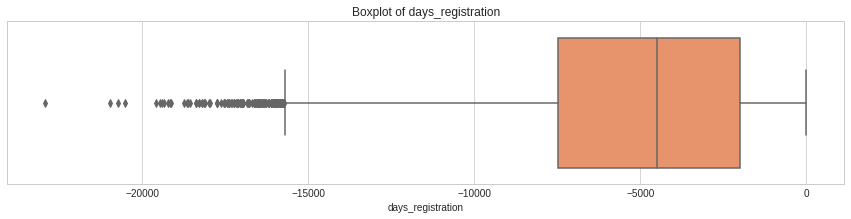

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'days_registration', data = app, palette = 'OrRd')
plt.title('Boxplot of days_registration')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_dr = app.describe()['days_registration']['25%']
Q3_dr = app.describe()['days_registration']['75%']
IQR_dr = Q3_dr - Q1_dr
UpFence_dr = Q3_dr + (1.5 * IQR_dr)
LoFence_dr = Q1_dr - (1.5 * IQR_dr)

out_dr = (app['days_registration'] < LoFence_dr) | (app['days_registration'] > UpFence_dr)
app[out_dr].sort_values(by = 'days_registration')

,ln_id,target,contract_type,gender,num_children,income,approved_credit,annuity,price,income_type,education,family_status,housing_type,days_age,days_work,days_registration,days_id_change,weekdays_apply,hour_apply,organization_type,ext_score_2
38827,435011,1,Cash loans,F,0,225000.0,1305909.0,43285.5,1170000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-22928,-16069,-22928.0,-4395,MONDAY,12,Industry: type 11,0.739787
7150,103127,0,Cash loans,F,0,135000.0,479700.0,49284.0,450000.0,Working,Secondary / secondary special,Married,House / apartment,-20981,-11653,-20981.0,-4504,SATURDAY,13,School,0.645238
28172,347901,0,Cash loans,F,0,112500.0,555273.0,18040.5,463500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22073,365243,-20741.0,-5022,FRIDAY,10,NA1,0.355126
33872,208132,0,Cash loans,F,0,214200.0,1515415.5,41800.5,1354500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20524,365243,-20516.0,-2433,TUESDAY,11,NA1,0.330612
14282,302032,0,Cash loans,F,0,112500.0,1133748.0,33147.0,990000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21205,365243,-19579.0,-4214,THURSDAY,12,NA1,0.564285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39235,392620,0,Cash loans,F,0,315000.0,326439.0,12433.5,229500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21662,365243,-15779.0,-4228,WEDNESDAY,11,NA1,0.637022
15975,211598,0,Cash loans,M,0,131400.0,450000.0,23107.5,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23646,365243,-15777.0,-4255,MONDAY,13,NA1,0.710385
229,124962,0,Cash loans,F,0,234000.0,969039.0,27324.0,783000.0,State servant,Secondary / secondary special,Married,House / apartment,-23132,-2050,-15758.0,-4244,WEDNESDAY,10,School,0.448588
3317,154554,1,Revolving loans,F,0,81000.0,292500.0,14625.0,292500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20327,365243,-15742.0,-3862,THURSDAY,7,NA1,0.588339


In [ ]:
print(f"Outliers of 'days_registration' column is below {LoFence_dr} .")
print(f"Total data which counted as an outliers is {len(app[out_dr].sort_values(by = 'days_registration'))} of {len(app)} rows.")
print(f"It's{(len(app[out_dr]) ) / len(app) * 100 : .2f}% from the entire rows.")

Outliers of 'days_registration' column is below -15703.5 .
Total data which counted as an outliers is 129 of 61503 rows.
It's 0.21% from the entire rows.


## hour_apply

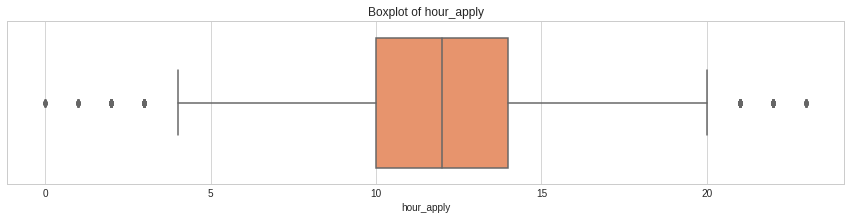

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'hour_apply', data = app, palette = 'OrRd')
plt.title('Boxplot of hour_apply')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_ha = app.describe()['hour_apply']['25%']
Q3_ha = app.describe()['hour_apply']['75%']
IQR_ha = Q3_ha - Q1_ha
UpFence_ha = Q3_ha + (1.5 * IQR_ha)
LoFence_ha = Q1_ha - (1.5 * IQR_ha)

out_ha = (app['hour_apply'] < LoFence_ha) | (app['hour_apply'] > UpFence_ha)
app[out_ha].sort_values(by = 'hour_apply')

,ln_id,target,contract_type,gender,num_children,income,approved_credit,annuity,price,income_type,education,family_status,housing_type,days_age,days_work,days_registration,days_id_change,weekdays_apply,hour_apply,organization_type,ext_score_2
320,261501,0,Cash loans,F,1,157500.0,1288350.0,37669.5,1125000.0,Working,Higher education,Married,With parents,-14021,-3556,-3288.0,-4479,MONDAY,0,Other,0.572541
44132,279477,0,Cash loans,M,0,157500.0,904500.0,62950.5,904500.0,Pensioner,Higher education,Married,House / apartment,-23344,365243,-23.0,-4209,SATURDAY,0,NA1,0.738805
10217,313088,0,Cash loans,M,1,180000.0,450000.0,48595.5,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-13700,-1705,-6051.0,-4067,FRIDAY,0,Business Entity Type 3,0.489496
37098,123919,0,Cash loans,M,0,270000.0,272520.0,21528.0,225000.0,Commercial associate,Higher education,Married,House / apartment,-10588,-701,-4825.0,-3125,THURSDAY,0,Business Entity Type 3,0.654859
43341,199985,0,Cash loans,F,0,135000.0,808650.0,23773.5,675000.0,State servant,Secondary / secondary special,Civil marriage,Municipal apartment,-13392,-501,-1750.0,-4355,FRIDAY,0,Business Entity Type 2,0.630561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51565,214897,0,Cash loans,F,0,135000.0,679500.0,22455.0,679500.0,Working,Higher education,Single / not married,House / apartment,-15169,-1463,-9273.0,-4054,TUESDAY,23,Business Entity Type 3,0.516555
50137,132201,0,Cash loans,M,2,405000.0,1288350.0,37669.5,1125000.0,Working,Higher education,Married,House / apartment,-13145,-1352,-2626.0,-4251,FRIDAY,23,Industry: type 9,0.739202
33688,329022,1,Cash loans,F,0,225000.0,1125000.0,32895.0,1125000.0,Pensioner,Secondary / secondary special,Married,Municipal apartment,-20605,365243,-5308.0,-1372,TUESDAY,23,NA1,0.231180
47494,165191,0,Cash loans,F,0,162000.0,545040.0,25407.0,450000.0,Working,Secondary / secondary special,Widow,House / apartment,-19269,-11059,-1807.0,-2803,FRIDAY,23,Transport: type 4,0.214876


In [ ]:
print(f"Outliers of 'hour_apply' column is above {UpFence_ha} and below {LoFence_ha}.")
print(f"Total data which counted as an outliers is {len(app[out_ha].sort_values(by = 'hour_apply'))} of {len(app)} rows.")
print(f"It's{(len(app[out_ha]) ) / len(app) * 100 : .2f}% from the entire rows.")

Outliers of 'hour_apply' column is above 20.0 and below 4.0.
Total data which counted as an outliers is 463 of 61503 rows.
It's 0.75% from the entire rows.


# 5) Exploratory Data Analysis

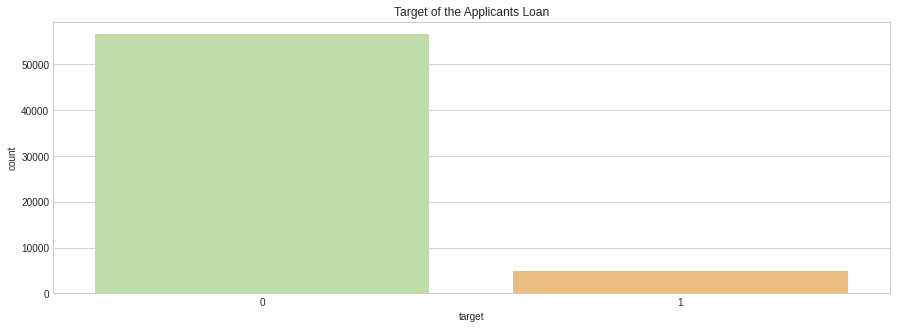

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(app['target'], palette = 'Spectral_r')
plt.title("Target of the Applicants Loan")

plt.style.use('seaborn-whitegrid')
plt.show()

# notice that we have imbalance target, which means good for the company's sustainability actually, but have to handle this before ML modelling.
# It consist of 92% (No Late Payment) and 8% (Late Payment).
# we will handle this later.

In [ ]:
app.stb.freq(['target'], cum_cols = False)

,target,count,percent
0,0,56534,91.920719
1,1,4969,8.079281


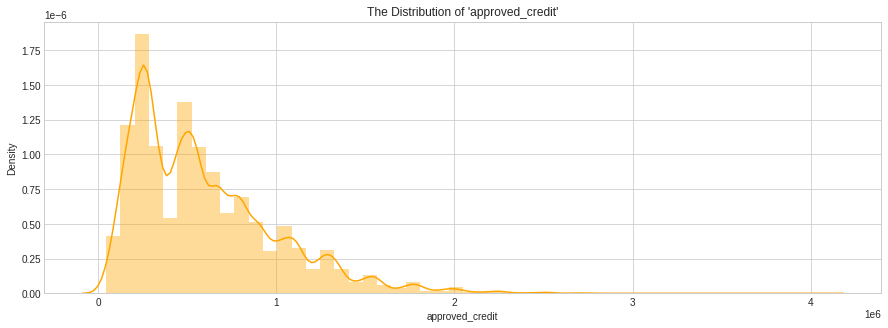

In [ ]:
plt.figure(figsize = (15,5))
sns.distplot(app['approved_credit'], color = 'orange')
plt.title("The Distribution of 'approved_credit'")

plt.style.use('seaborn-whitegrid')
plt.show()

# we see that most approved credit's value is around below 500,000

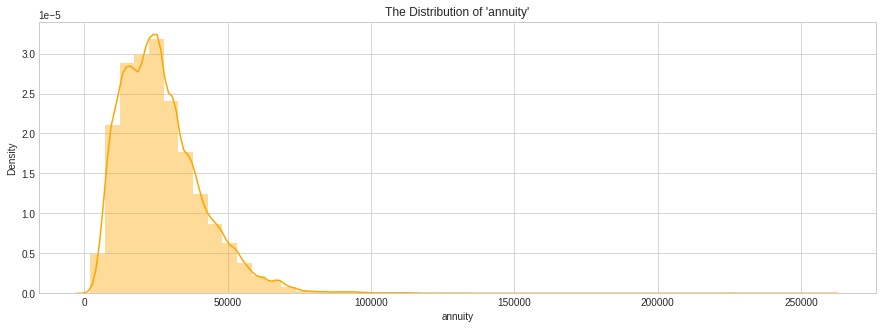

In [ ]:
plt.figure(figsize = (15,5))
sns.distplot(app['annuity'], color = 'orange')
plt.title("The Distribution of 'annuity'")

plt.style.use('seaborn-whitegrid')
plt.show()

# we see that most annuity comes to around 25,000

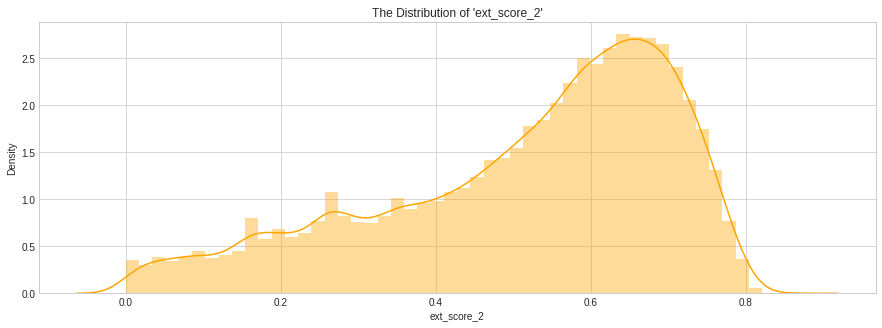

In [ ]:
plt.figure(figsize = (15,5))
sns.distplot(app['ext_score_2'], color = 'orange')
plt.title("The Distribution of 'ext_score_2'")

plt.style.use('seaborn-whitegrid')
plt.show()

# we see the most external score is about 0.7 of 1.0 .

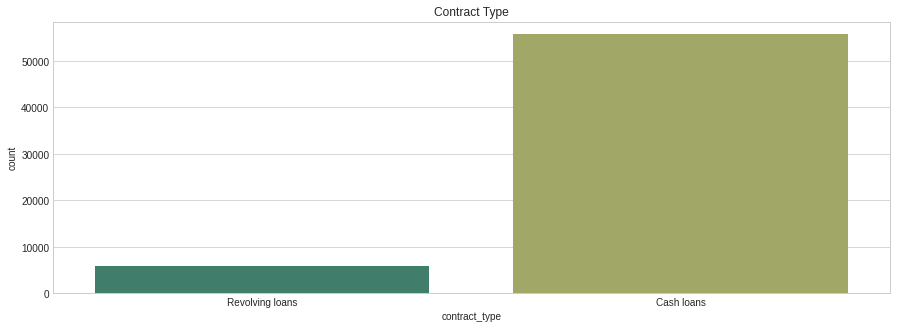

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(app['contract_type'], palette = 'gist_earth')
plt.title("Contract Type")

plt.style.use('seaborn-whitegrid')
plt.show()

# 90.6% of applicant loans have 'cash loans' contract type while the other 9.4% are revolving

In [ ]:
app.stb.freq(['contract_type'], cum_cols = False)

,contract_type,count,percent
0,Cash loans,55699,90.563062
1,Revolving loans,5804,9.436938


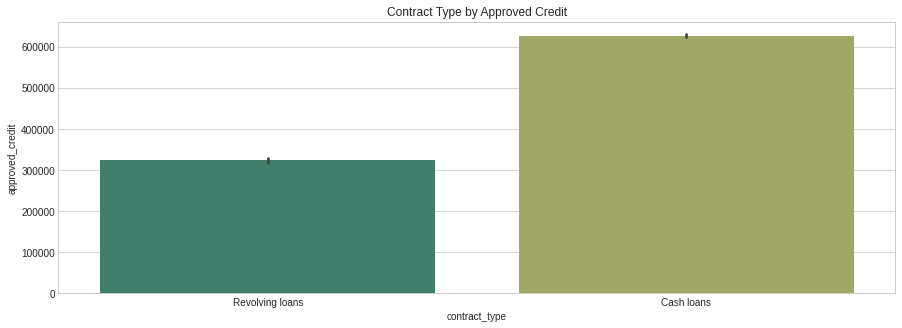

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = app['contract_type'], 
            y = app['approved_credit'],
            palette = 'gist_earth')
plt.title("Contract Type by Approved Credit")

plt.style.use('seaborn-whitegrid')
plt.show()

# Here we see that Cash Loan type has higher average with its percentage is 65.9% (626,243.7)
# while Revolving type with 34.07% (323,668.2)

In [ ]:
pd.crosstab(index = "Average of Approved Credit",
            columns = app['contract_type'],
            values = app['approved_credit'],
            aggfunc = 'mean')

contract_type,Cash loans,Revolving loans
row_0,,
Average of Approved Credit,626243.792097,323668.15989


In [ ]:
(pd.crosstab(index = "Average of Approved Credit",
            columns = app['contract_type'],
            values = app['approved_credit'],
            aggfunc = 'mean',
            normalize = 'index')*100).round(2)

contract_type,Cash loans,Revolving loans
row_0,,
Average of Approved Credit,65.93,34.07


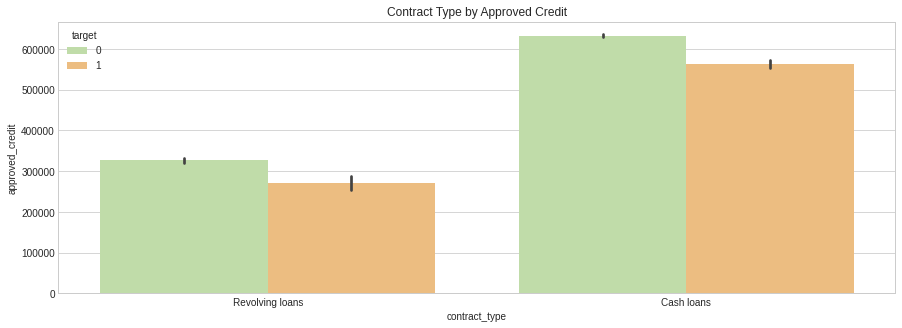

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = app['contract_type'], 
            y = app['approved_credit'],
            hue = app['target'], 
            palette = 'Spectral_r')
plt.title("Contract Type by Approved Credit")

plt.style.use('seaborn-whitegrid')
plt.show()

# Applicants who has Cash Loan contract and don't late in payment, have average credit about 631,991
# while they who late in payment have average credit about 563,142

In [ ]:
pd.crosstab(index = app['target'],
            columns = app['contract_type'],
            values = app['approved_credit'],
            aggfunc = 'mean')

contract_type,Cash loans,Revolving loans
target,,
0,631991.639493,326764.813127
1,563142.316452,270423.197492


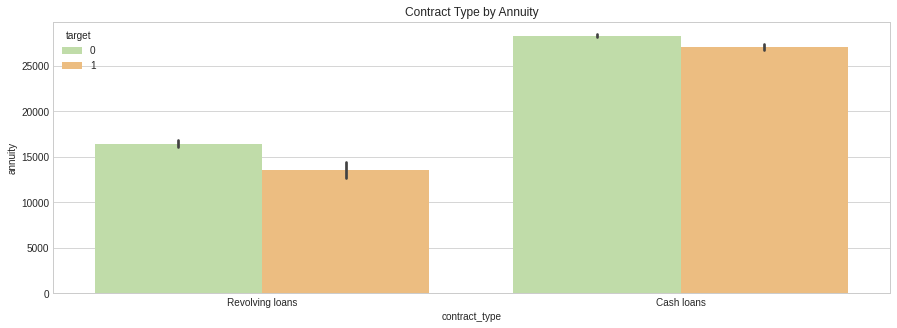

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = app['contract_type'], 
            y = app['annuity'],
            hue = app['target'], 
            palette = 'Spectral_r')
plt.title("Contract Type by Annuity")

plt.style.use('seaborn-whitegrid')
plt.show()

# when it comes to annuity, cash loans type has slightly difference between late payment and not
# most applicants who do not late in payment have average annuity around 28,316
# while applicants who late in payment have average annuity about 27,020

In [ ]:
pd.crosstab(index = app['target'],
            columns = app['contract_type'],
            values = app['annuity'],
            aggfunc = 'mean')

contract_type,Cash loans,Revolving loans
target,,
0,28316.118700,16451.458523
1,27020.292581,13521.159875


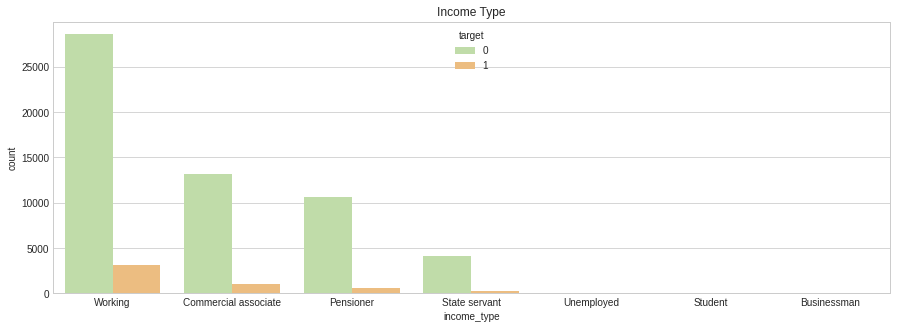

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(x = app['income_type'], 
            hue = app['target'], 
            palette = 'Spectral_r')
plt.title("Income Type")

plt.style.use('seaborn-whitegrid')
plt.show()

# In income type, they're seem fine because the proportion of target still dominated by applicants who do not late in payment

In [ ]:
(pd.crosstab(index = app['target'],
            columns = app['income_type'],
            normalize = 'columns')*100).round(2)

income_type,Businessman,Commercial associate,Pensioner,State servant,Student,Unemployed,Working
target,,,,,,,
0,100.0,92.48,94.86,94.33,100.0,80.0,90.29
1,0.0,7.52,5.14,5.67,0.0,20.0,9.71


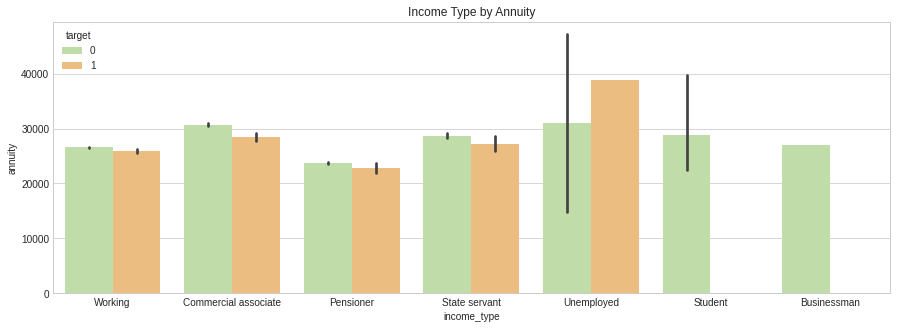

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = app['income_type'], 
            y = app['annuity'],
            hue = app['target'], 
            palette = 'Spectral_r')
plt.title("Income Type by Annuity")

plt.style.use('seaborn-whitegrid')
plt.show()

# When it comes to income type, applicants who has income type like student and businessman are clean, 
  # they are all don't late in payment.
# Meanwhile we see that unemployed applicants who late in payment has higher annuity compare to they who don't late in payment.
# Unemployed applicants who late in payment have average annuity around 38,839.500
  # while they who don't late in payment have average annuity around 31,017.375

In [ ]:
pd.crosstab(index = app['target'],
            columns = app['income_type'],
            values = app['annuity'],
            aggfunc = 'mean')

income_type,Businessman,Commercial associate,Pensioner,State servant,Student,Unemployed,Working
target,,,,,,,
0,27000.0,30712.198471,23741.657155,28725.39656,28908.0,31017.375,26583.023380
1,NaN,28458.269411,22808.709343,27183.02400,NaN,38839.500,25893.093781


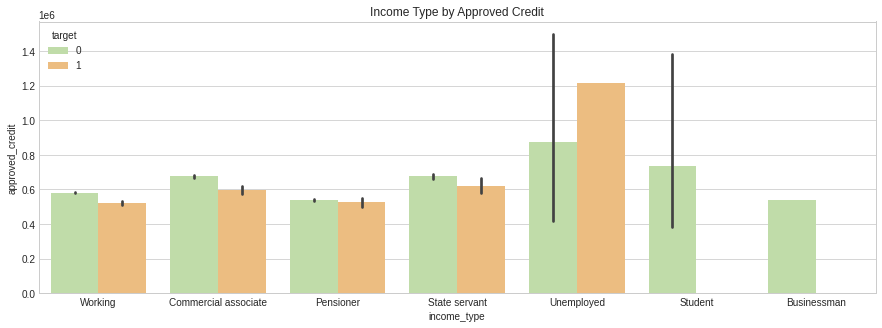

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = app['income_type'], 
            y = app['approved_credit'],
            hue = app['target'], 
            palette = 'Spectral_r')
plt.title("Income Type by Approved Credit")

plt.style.use('seaborn-whitegrid')
plt.show()

# unemployed applicants who late in payment has average credit around 1,215,000.0 . 
# This is the highest average credit between the other income type.
# while they who don't late in payment has average credit around 875,250.0

# Lenders should be careful when lend their money to unemployed applicants who loan credit above 875,250 .

In [ ]:
pd.crosstab(index = app['target'],
            columns = app['income_type'],
            values = app['approved_credit'],
            aggfunc = 'mean')

income_type,Businessman,Commercial associate,Pensioner,State servant,Student,Unemployed,Working
target,,,,,,,
0,540000.0,676361.232887,538252.589401,676691.142651,737547.0,875250.0,581404.434746
1,NaN,597786.962582,525740.301903,619371.864000,NaN,1215000.0,522926.293715


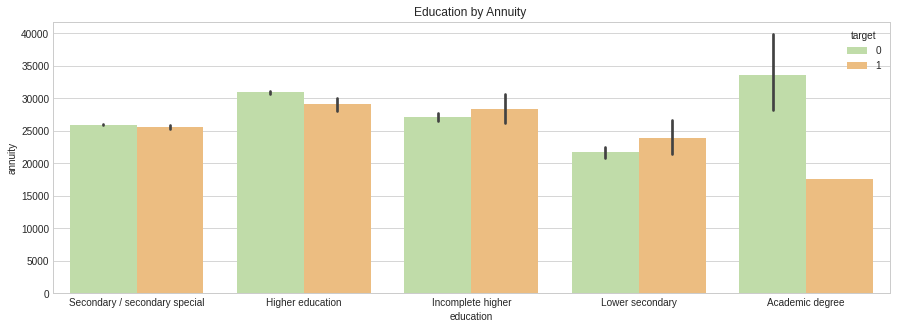

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = app['education'], 
            y = app['annuity'],
            hue = app['target'], 
            palette = 'Spectral_r')
plt.title("Education by Annuity ")

plt.style.use('seaborn-whitegrid')
plt.show()

# contrastly, we can know that education matters in this case of payment
# notice to 'lower secondary' and 'incomplete higher education' are tend to late in payment
# while applicants who have academic degree are likely to not late in payment eventhough they have the highest average of annuity around 33,529

In [ ]:
pd.crosstab(index = app['target'],
            columns = app['education'],
            values = app['annuity'],
            aggfunc = 'mean')

education,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
target,,,,,
0,33529.909091,30878.32132,27109.057836,21694.739645,25938.395470
1,17563.500000,29034.01178,28285.349112,23922.482143,25555.137813


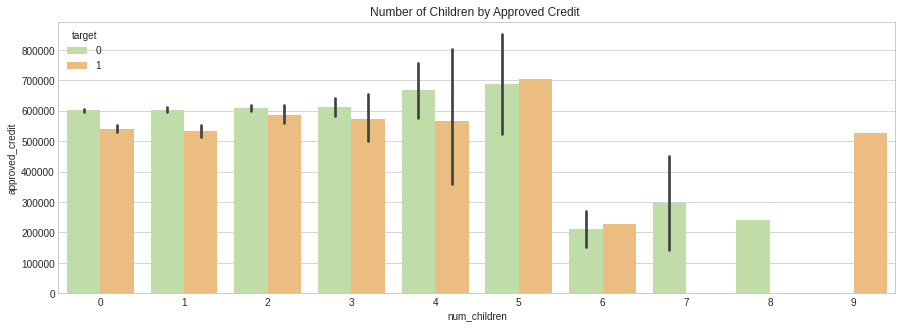

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = app['num_children'], 
            y = app['approved_credit'],
            hue = app['target'], 
            palette = 'Spectral_r')
plt.title("Number of Children by Approved Credit ")

plt.style.use('seaborn-whitegrid')
plt.show()

# applicants who have children between 5 and 9 children tend to late in payment.
# applicants who have 9 children and late in payment have approved credit around 526,491.0
# applicants who have 5 children and late in payment have approved credit around 704,844.0
# applicants who have 6 children and late in payment have approved credit around 229,230.0
# while applicants who have less than 5 children are tend to not late in payment.

# we see that number of children matters.

In [ ]:
pd.crosstab(index = app['target'],
            columns = app['num_children'],
            values = app['approved_credit'],
            aggfunc = 'mean')

num_children,0,1,2,3,4,5,6,7,8,9
target,,,,,,,,,,
0,600939.060695,603860.919089,608687.508263,611380.860182,667401.456522,687240.0,211410.0,296955.0,239850.0,NaN
1,541570.869937,533709.832581,587082.545147,573126.534247,566022.000000,704844.0,229230.0,NaN,NaN,526491.0


# 6) Feature Engineering

## gender
We encode the 'gender' column with `map` method because these values are binary.

In [ ]:
app['gender'].value_counts()

F    40549
M    20954
Name: gender, dtype: int64

In [ ]:
app['gender'] = app['gender'].map({
                                    'F' : 0,
                                    'M' : 1
                                })

## education
Since this is ordinal (not nominal), we can encode this column like label encoding. Higher education has higher value.

In [ ]:
app['education'].value_counts()

Secondary / secondary special    43777
Higher education                 14887
Incomplete higher                 2045
Lower secondary                    760
Academic degree                     34
Name: education, dtype: int64

In [ ]:
app['education'] = app['education'].map({
                                         'Lower secondary' : 0,
                                         'Secondary / secondary special' : 1,
                                         'Incomplete higher' : 2,
                                         'Higher education' : 3,
                                         'Academic degree' : 4
                                      })

## weekdays_apply
Name of weekdays will be encoded like the number of days. Start from Monday (1), and will be ended in Sunday (7).

In [ ]:
app['weekdays_apply'].value_counts()

TUESDAY      10838
WEDNESDAY    10477
MONDAY       10234
THURSDAY     10011
FRIDAY        9993
SATURDAY      6795
SUNDAY        3155
Name: weekdays_apply, dtype: int64

In [ ]:
app['weekdays_apply'] = app['weekdays_apply'].map({
                                                   'MONDAY' : 1,
                                                   'TUESDAY' : 2,
                                                   'WEDNESDAY' : 3,
                                                   'THURSDAY' : 4,
                                                   'FRIDAY' : 5,
                                                   'SATURDAY' : 6,
                                                   'SUNDAY' : 7
                                                })

## 'contract_type',                        'income_type',                           'family_status','housing_type'

Since this is nominal categorical, we can use one hot encoding to make dummy variables.

In [ ]:
app.head()

,ln_id,target,contract_type,gender,num_children,income,approved_credit,annuity,price,income_type,education,family_status,housing_type,days_age,days_work,days_registration,days_id_change,weekdays_apply,hour_apply,organization_type,ext_score_2
0,333538,0,Revolving loans,0,1,67500.0,202500.0,10125.0,202500.0,Working,1,Married,With parents,-11539,-921,-119.0,-2757,2,18,Business Entity Type 3,0.608276
1,406644,0,Cash loans,0,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,1,Married,House / apartment,-15743,-4482,-1797.0,-2455,2,14,Other,0.684298
2,259130,0,Cash loans,0,0,180000.0,407520.0,25060.5,360000.0,Pensioner,1,Married,House / apartment,-20775,365243,-8737.0,-4312,4,14,NA1,0.580687
3,411997,0,Cash loans,1,0,225000.0,808650.0,26086.5,675000.0,State servant,3,Married,House / apartment,-20659,-10455,-4998.0,-4010,3,10,Culture,0.623740
4,241559,0,Revolving loans,1,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,1,Single / not married,House / apartment,-9013,-1190,-3524.0,-1644,7,11,Construction,0.492994


In [ ]:
app = pd.get_dummies(app, columns = ['contract_type', 
                                     'income_type',
                                     'family_status',
                                     'housing_type']
)

## organization_type

In [ ]:
app['organization_type'].value_counts()

# Realistically there are too many unique organization type to try to convert this to a dummy variable feature.
# If we do recategorize or encode this, it'd be so many for ML
# Let's remove that organization_type column.

Business Entity Type 3    13561
NA1                       11253
Self-employed              7700
Other                      3305
Medicine                   2224
Business Entity Type 2     2083
Government                 2045
School                     1787
Trade: type 7              1557
Kindergarten               1388
Construction               1374
Business Entity Type 1     1185
Transport: type 4          1020
Trade: type 3               663
Industry: type 9            660
Industry: type 3            638
Housing                     611
Security                    596
Military                    540
Industry: type 11           533
Bank                        526
Agriculture                 504
Police                      457
Transport: type 2           436
Postal                      413
Security Ministries         399
Trade: type 2               371
Restaurant                  352
University                  311
Services                    301
Industry: type 7            241
Transpor

In [ ]:
app.drop(['ln_id', 'organization_type'], axis = 1, inplace = True)

In [ ]:
app.shape

(61503, 35)

# 7) Base Model for Initial Evaluation
Why? We need initial base model to see the Features' coefficient and using it as feature selection, and to prove that we can't use `accuracy` metrics on this dataset since it has imbalance class.

But first, let's split into train and test dataset.

## Before Balancing The Target

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Dataset for Initial Model

X_init = app.drop('target', axis = 1)
y_init = app['target']

X_train_init, X_test_init, y_train_init, y_test_init = train_test_split(X_init, 
                                                                        y_init, 
                                                                        test_size = 0.2, 
                                                                        random_state = 88,
                                                                        stratify = y_init)

In [ ]:
initial = LogisticRegression()
initial.fit(X_train_init, y_train_init)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_init = initial.predict(X_test_init)

In [ ]:
# TRAINING
initial.score(X_train_init, y_train_init)

0.9191902768180156

In [ ]:
# TESTING
initial.score(X_test_init, y_test_init)

0.9191935614990652

In [ ]:
app.stb.freq(['target'], cum_cols = False)

# see? if we use 'accuracy' the model predicts accurately like the number of class '0'.
# the model will bias when handle the other cases.

,target,count,percent
0,0,56534,91.920719
1,1,4969,8.079281


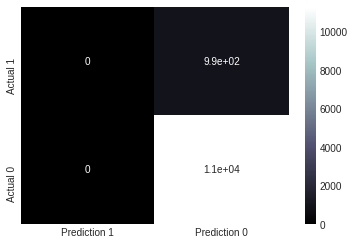

In [ ]:
init_cm = confusion_matrix(y_test_init, pred_init, labels = [1,0])
init_cm_df = pd.DataFrame(data = init_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(init_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
print(classification_report(y_test_init, pred_init))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11307
           1       0.00      0.00      0.00       994

    accuracy                           0.92     12301
   macro avg       0.46      0.50      0.48     12301
weighted avg       0.84      0.92      0.88     12301



In [ ]:
init_cm_df

# The model can predict '0' perfectly but not sure it can predict '1' since the TruePositive (TN) is 0.

,Prediction 1,Prediction 0
Actual 1,0,994
Actual 0,0,11307


## Balancing the Imbalance Target
We know that imbalance target (class) can't help us to have a great model, let us handle this problem.

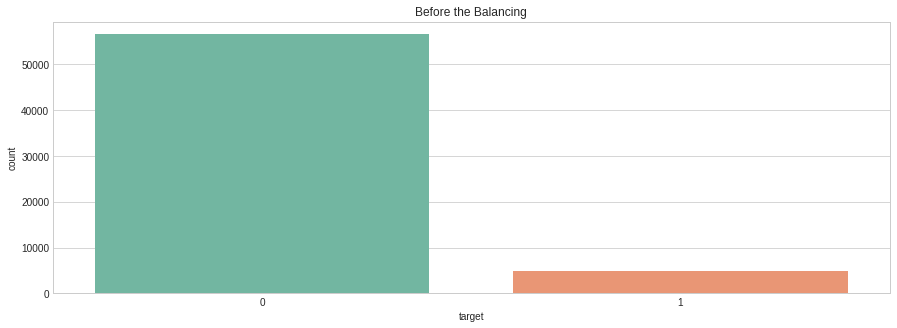

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(app['target'], palette = 'Set2')
plt.title("Before the Balancing")
plt.show()

In [ ]:
app.stb.freq(['target'], cum_cols = False)

,target,count,percent
0,0,56534,91.920719
1,1,4969,8.079281


In [ ]:
# From many methods of sampling (under and over sampling), we use SMOTE
# SMOTE stands for Synthetic Minority Oversampling TEchnique
# SMOTE doesn't sampling randomly, instead it synthesizes new examples for the minority class.

from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE()

In [ ]:
# SMOTE for training dataset only

X_train_init_smote, y_train_init_smote = sm.fit_sample(X_train_init, y_train_init)

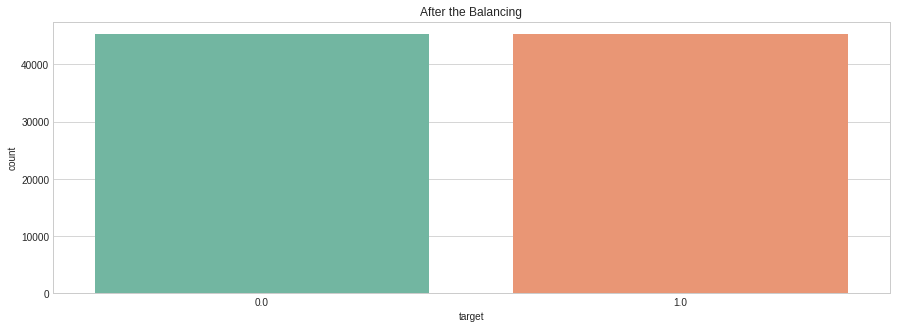

In [ ]:
# This cell is for visualization purposes

xsmote_init = pd.DataFrame(data = X_train_init_smote, columns = X_init.columns)
ysmote_init = pd.DataFrame(data = y_train_init_smote, columns = ['target'])
train_init_smote = pd.concat([xsmote_init, ysmote_init])

plt.figure(figsize = (15,5))
sns.countplot(train_init_smote['target'], palette = 'Set2')
plt.title("After the Balancing")
plt.show()

# See that now we have balance class with 45227 rows each class.

In [ ]:
train_init_smote.stb.freq(['target'], cum_cols = False)

,target,count,percent
0,1.0,45227,50.0
1,0.0,45227,50.0


## After Balancing The Target

In [ ]:
# using Robust Scaler since it has different range of value for each column and it will robust the outliers too.
# and it needed for distance based algorithm like LogisticRegression and Support Vector Machine.

from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()

X_train_init_sc_smote = scaler.fit_transform(X_train_init_smote)
X_test_init_sc = scaler.transform(X_test_init)

In [ ]:
init_smote = LogisticRegression()
init_smote.fit(X_train_init_sc_smote, y_train_init_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_init_smote = init_smote.predict(X_test_init_sc)

In [ ]:
init_smote.score(X_test_init_sc, y_test_init)

# now we see that the model starts to have lower accuracy after the balancing class
# note that we still can't use 'accuracy' since this whole data is still imbalance class

0.661816112511178

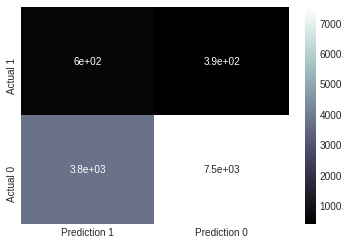

In [ ]:
init_cm_smote = confusion_matrix(y_test_init, pred_init_smote, labels = [1,0])
init_cm_df_smote = pd.DataFrame(data = init_cm_smote,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(init_cm_df_smote, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
print(classification_report(y_test_init, pred_init_smote))

# Since this is an imbalance dataset, we can't use accuracy. 
# We either choose recall or precision.
# Recall or Precision? Minimize FalseNegative or FalsePositive?

# FP = Model predicts 'late payment' while the actual is not late.
# FN = Model predicts 'no late payment' while the actual is late.
# We will go to minimze FN, because it would be a great loss for Lender 
# if our model says the borrower is no late in payment but actually the borrower is late in payment.
# Lender's money will leave away and have no return for him. 
# Since he won't get the return, we can't have service fee from lenders.

# Precision < Recall (minimize FN)
# Recall increased from 0.00 to 0.61

              precision    recall  f1-score   support

           0       0.95      0.67      0.78     11307
           1       0.14      0.61      0.22       994

    accuracy                           0.66     12301
   macro avg       0.54      0.64      0.50     12301
weighted avg       0.88      0.66      0.74     12301



In [ ]:
init_cm_df_smote

,Prediction 1,Prediction 0
Actual 1,602,392
Actual 0,3768,7539


# 8) Data Preprocessing

## Feature Selection

In [ ]:
init_coef_smote = dict(zip(X_init.columns, abs(init_smote.coef_[0])))
pd.DataFrame.from_dict(data = init_coef_smote, 
                       orient = 'index', 
                       columns=['Coef']
                       ).sort_values(by = 'Coef', ascending = False)

# Notice that Normalized score from external data, gender, price, ...
# ... Client's age in days at the time of application, and rented apartment housing type ...
# ... are the most affected to Target (late or no late in payment) for the Model


,Coef
ext_score_2,0.865220
gender,0.434755
price,0.367599
days_age,0.324358
housing_type_Rented apartment,0.309839
approved_credit,0.306258
housing_type_Office apartment,0.259779
family_status_Married,0.248097
days_id_change,0.247282
contract_type_Revolving loans,0.228333


In [ ]:
# Selecting features which not near 0.00

feat_coef = app[['ext_score_2', 'price', 'approved_credit',
       'housing_type_Rented apartment', 'housing_type_Office apartment',
       'gender', 'days_age', 'family_status_Widow', 'family_status_Married',
       'days_id_change', 'housing_type_Municipal apartment',
       'income_type_Working', 'contract_type_Cash loans',
       'contract_type_Revolving loans', 'housing_type_With parents',
       'income_type_State servant', 'education', 'income_type_Pensioner',
       'days_registration', 'annuity', 'family_status_Single / not married',
       'family_status_Civil marriage', 'housing_type_House / apartment',
       'num_children', 'hour_apply', 'income_type_Commercial associate',
       'income', 'target']]

In [ ]:
# New Dataframe with selected features for ML Modeling

feat_coef.head()

,ext_score_2,price,approved_credit,housing_type_Rented apartment,housing_type_Office apartment,gender,days_age,family_status_Widow,family_status_Married,days_id_change,housing_type_Municipal apartment,income_type_Working,contract_type_Cash loans,contract_type_Revolving loans,housing_type_With parents,income_type_State servant,education,income_type_Pensioner,days_registration,annuity,family_status_Single / not married,family_status_Civil marriage,housing_type_House / apartment,num_children,hour_apply,income_type_Commercial associate,income,target
0,0.608276,202500.0,202500.0,0,0,0,-11539,0,1,-2757,0,1,0,1,1,0,1,0,-119.0,10125.0,0,0,0,1,18,0,67500.0,0
1,0.684298,873000.0,976711.5,0,0,0,-15743,0,1,-2455,0,0,1,0,0,0,1,0,-1797.0,49869.0,0,0,1,1,14,1,202500.0,0
2,0.580687,360000.0,407520.0,0,0,0,-20775,0,1,-4312,0,0,1,0,0,0,1,1,-8737.0,25060.5,0,0,1,0,14,0,180000.0,0
3,0.623740,675000.0,808650.0,0,0,1,-20659,0,1,-4010,0,0,1,0,0,1,3,0,-4998.0,26086.5,0,0,1,0,10,0,225000.0,0
4,0.492994,180000.0,180000.0,0,0,1,-9013,0,0,-1644,0,0,0,1,0,0,1,0,-3524.0,9000.0,1,0,1,0,11,1,135000.0,0


In [ ]:
print(f"Total Features: {app.shape[1]} columns.")
print(f"Selected Features: {feat_coef.shape[1]-1} columns.")

Total Features: 35 columns.
Selected Features: 27 columns.


## Splitting Data into Train and Test set

In [ ]:
# Splitting for 80% train set and 20% test set

X = feat_coef.drop('target', axis = 1)
y = feat_coef['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 88, stratify = y)

## Handling Imbalance Target
We already selected some features, so we should SMOTE the new dataframe first.

In [ ]:
# Handling Imbalance
# This dataset is FOR TREE BASED ALGORITHM

X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

## Feature Scaling

In [ ]:
# Feature Scaling
# This dataset is FOR DISTANCE BASED ALGORITHM

scaler_robust = RobustScaler()

X_train_sc_smote = scaler_robust.fit_transform(X_train_smote)
X_test_sc = scaler_robust.transform(X_test)

# 9) Machine Learning Modelling
We only focus on `Recall` evaluation metrics since we want to minimize False Negative.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score

In [ ]:
# we have to remember that the test set is well-separated and still imbalance, and that's totally fine.

print(f"0 in y_test: {len(y_test[y_test == 0])} rows or about {(len(y_test[y_test == 0]))/(len(y_test)) : .2f}%.")
print(f"1 in y_test: {len(y_test[y_test == 1])} rows or about {(len(y_test[y_test == 1]))/(len(y_test)) : .2f}%.")

0 in y_test: 11307 rows or about  0.92%.
1 in y_test: 994 rows or about  0.08%.


## Logistic Regression

In [ ]:
lr = LogisticRegression()           # assign the model with variable 'lr'

In [ ]:
lr.fit(X_train_sc_smote, y_train_smote)     # train/fit the model with train dataset which already smote and scaled

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_lr = lr.predict(X_test_sc)         # predict the model with test dataset which already scaled

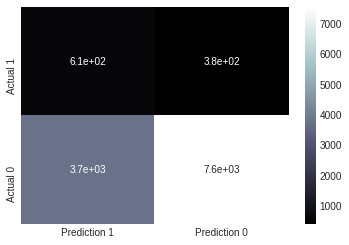

In [ ]:
lr_cm = confusion_matrix(y_test, pred_lr, labels = [1,0])     # confusion matrix
lr_cm_df = pd.DataFrame(data = lr_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])  # confusion matrix into DataFrame

sns.heatmap(lr_cm_df, annot = True, cmap = 'bone')            # visualize the confusion matrix
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
print(classification_report(y_test, pred_lr))

# LogisticRegression algorithm gets Recall score 0.61 with 383 FN.

              precision    recall  f1-score   support

           0       0.95      0.67      0.79     11307
           1       0.14      0.61      0.23       994

    accuracy                           0.66     12301
   macro avg       0.55      0.64      0.51     12301
weighted avg       0.89      0.66      0.74     12301



In [ ]:
lr_cm_df

# TP = 611
# TN = 7558
# FP 3749
# FN = 383

,Prediction 1,Prediction 0
Actual 1,611,383
Actual 0,3749,7558


In [ ]:
# DataFrame for Models' Summary later

rec_lr = pd.DataFrame({"Recall Score" : recall_score(y_test, pred_lr)}, 
                       index = ['Logistic Regression'])

tp_lr = lr_cm_df['Prediction 1'][0]
fp_lr = lr_cm_df['Prediction 1'][1]
fn_lr = lr_cm_df['Prediction 0'][0]
tn_lr = lr_cm_df['Prediction 0'][1]

## Support Vector Machine

In [ ]:
sv = SVC(max_iter = 2000)

In [ ]:
sv.fit(X_train_sc_smote, y_train_smote)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=2000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_sv = sv.predict(X_test_sc)

In [ ]:
print(classification_report(y_test, pred_sv))

# Support Vector Machine Classfier algorithm gets Recall score 0.92 with 83 FN.

              precision    recall  f1-score   support

           0       0.96      0.18      0.30     11307
           1       0.09      0.92      0.16       994

    accuracy                           0.24     12301
   macro avg       0.53      0.55      0.23     12301
weighted avg       0.89      0.24      0.29     12301



In [ ]:
sv_cm = confusion_matrix(y_test, pred_sv, labels = [1,0])
sv_cm_df = pd.DataFrame(data = sv_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sv_cm_df


,Prediction 1,Prediction 0
Actual 1,911,83
Actual 0,9280,2027


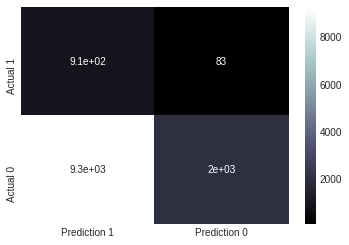

In [ ]:
sns.heatmap(sv_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
rec_sv = pd.DataFrame({"Recall Score" : recall_score(y_test, pred_sv)}, 
                       index = ['SVC'])


tp_sv = sv_cm_df['Prediction 1'][0]
fp_sv = sv_cm_df['Prediction 1'][1]
fn_sv = sv_cm_df['Prediction 0'][0]
tn_sv = sv_cm_df['Prediction 0'][1]

## Random Forest

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_rf = rf.predict(X_test)

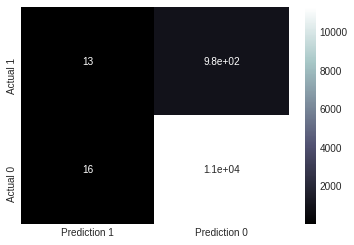

In [ ]:
rf_cm = confusion_matrix(y_test, pred_rf, labels = [1,0])
rf_cm_df = pd.DataFrame(data = rf_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(rf_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
print(classification_report(y_test, pred_rf))

# Random Forest Classifier algorithm gets Recall score 0.01 with 981 FN.

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11307
           1       0.45      0.01      0.03       994

    accuracy                           0.92     12301
   macro avg       0.68      0.51      0.49     12301
weighted avg       0.88      0.92      0.88     12301



In [ ]:
rf_cm_df


,Prediction 1,Prediction 0
Actual 1,13,981
Actual 0,16,11291


In [ ]:
rec_rf = pd.DataFrame({"Recall Score" : recall_score(y_test, pred_rf)}, 
                       index = ['Random Forest'])


tp_rf = rf_cm_df['Prediction 1'][0]
fp_rf = rf_cm_df['Prediction 1'][1]
fn_rf = rf_cm_df['Prediction 0'][0]
tn_rf = rf_cm_df['Prediction 0'][1]

## Xtreme Gradient Boosting

In [ ]:
xg = GradientBoostingClassifier()

In [ ]:
xg.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
pred_xg = xg.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_xg))

# Gradient Boosting Classifier algorithm gets Recall score 0.01 with 988 FN.

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11307
           1       0.35      0.01      0.01       994

    accuracy                           0.92     12301
   macro avg       0.64      0.50      0.48     12301
weighted avg       0.87      0.92      0.88     12301



In [ ]:
xg_cm = confusion_matrix(y_test, pred_xg, labels = [1,0])
xg_cm_df = pd.DataFrame(data = xg_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

xg_cm_df


,Prediction 1,Prediction 0
Actual 1,6,988
Actual 0,11,11296


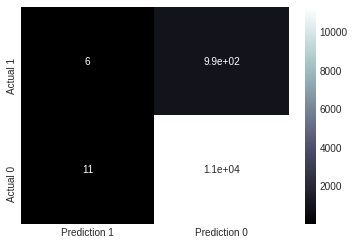

In [ ]:
sns.heatmap(xg_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
rec_xg = pd.DataFrame({"Recall Score" : recall_score(y_test, pred_xg)}, 
                       index = ['XGBoost'])


tp_xg = xg_cm_df['Prediction 1'][0]
fp_xg = xg_cm_df['Prediction 1'][1]
fn_xg = xg_cm_df['Prediction 0'][0]
tn_xg = xg_cm_df['Prediction 0'][1]

# 10) Optimization

## Logistic Regression

In [ ]:
lr_t = LogisticRegression()

# Setup the parameters for LogisticRegression with various values
param_lr = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'], 
    "C"      : np.logspace(-5,1,20),
    "max_iter" : [10,25,50, 100, 500]
}

# Using GridSearch with 4 cross-validation to find the best parameter and best recall score
grid_lr = GridSearchCV(
    estimator = lr_t,
    param_grid = param_lr,
    cv = 4,
    scoring = 'recall',
    refit = True,
    n_jobs = -1,
    verbose = 3
)

In [ ]:
grid_lr.fit(X_train_sc_smote, y_train_smote)


Fitting 4 folds for each of 400 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 1488 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:   56.6s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 2.069...
       1.83298071e-04, 3.79269019e-04, 7.84759970e-04, 1.62377674e-03,
       3.35981829e-03, 6.95192796e-03, 1.43844989e-02, 2.97635144e-02,
       6.15848211e-02, 1.27427499e-01, 2.63665090e-01, 5.45559478e-01,
       1.12883789e+00, 2.33572147e+00, 4.83293024e+00, 1.00000000e+01]),
      

In [ ]:
grid_lr.best_params_

# {'C': 1e-05, 'max_iter': 100, 'penalty': 'l2'}
# Rec 0.65 | FN 352

# {'C': 6.899655172413793, 'max_iter': 100, 'penalty': 'l2'}
# Rec 0.62 | FN 382

# {'C': 8.858667904100832e-06, 'max_iter': 10, 'penalty': 'l2'}
# Rec 0.64 | FN 353

# {'C': 2.6366508987303554e-07, 'max_iter': 10, 'penalty': 'l2'}
# Rec 0.64 | FN 355

# {'C': 8.858667904100832e-06, 'max_iter': 10, 'penalty': 'l2'}
# Rec 0.64 | FN 353

{'C': 1e-05, 'max_iter': 10, 'penalty': 'l2'}

In [ ]:
pred_lrt = grid_lr.predict(X_test_sc)

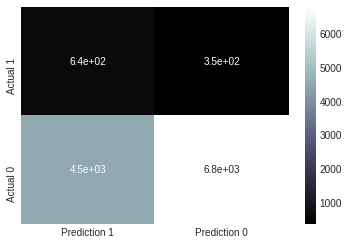

In [ ]:
lrt_cm = confusion_matrix(y_test, pred_lrt, labels = [1,0])
lrt_cm_df = pd.DataFrame(data = lrt_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(lrt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
print(classification_report(y_test, pred_lrt))

# Tuned LogisticRegression algorithm gets Recall score 0.64 with 353 FN.

              precision    recall  f1-score   support

           0       0.95      0.60      0.74     11307
           1       0.12      0.64      0.21       994

    accuracy                           0.60     12301
   macro avg       0.54      0.62      0.47     12301
weighted avg       0.88      0.60      0.69     12301



In [ ]:
lrt_cm_df


,Prediction 1,Prediction 0
Actual 1,641,353
Actual 0,4509,6798


In [ ]:
rec_lrt = pd.DataFrame({"Recall Score" : recall_score(y_test, pred_lrt)}, 
                       index = ['Tuned Logistic Regression'])


tp_lrt = lrt_cm_df['Prediction 1'][0]
fp_lrt = lrt_cm_df['Prediction 1'][1]
fn_lrt = lrt_cm_df['Prediction 0'][0]
tn_lrt = lrt_cm_df['Prediction 0'][1]

In [ ]:
tuned_lr = grid_lr.best_estimator_

## Support Vector Machine

In [ ]:
sv_t = SVC()

param_sv = {
    "C" : np.logspace(-4,4,20),
    "gamma" : ['scale', 'auto'],
    "max_iter" : np.arange(1000,5001, 500),
}

grid_sv = RandomizedSearchCV(
    estimator = sv_t,
    param_distributions = param_sv,
    cv = 7,
    scoring = 'recall',
    refit = True,
    n_jobs = -1,
    verbose = 3,
    n_iter = 50
)

In [ ]:
grid_sv.fit(X_train_sc_smote, y_train_smote)

Fitting 7 folds for each of 50 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed: 11.5min finished


RandomizedSearchCV(cv=7, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([1.00000...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'gamma': ['scale', 'auto'],
                                        'max_iter': array([1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])},
    

In [ ]:
grid_sv.best_params_

# {'C': 1.0, 'gamma': 'auto', 'max_iter': 3500}
# Rec 0.99 | FN 12

# {'C': 0.23357214690901212, 'gamma': 'auto', 'max_iter': 3500}
# Rec 0.99 | FN 11

# {'C': 0.23357214690901212, 'gamma': 'auto', 'max_iter': 4500}
# Rec 0.99 | FN 6

# {'C': 0.08858667904100823, 'gamma': 'auto', 'max_iter': 4500}
# Rec 0.99 | FN 13

# {'C': 0.615848211066026, 'gamma': 'auto', 'max_iter': 4500}
# Rec 0.99 | FN 8

{'C': 0.615848211066026, 'gamma': 'auto', 'max_iter': 2500}

In [ ]:
pred_svt = grid_sv.predict(X_test_sc)

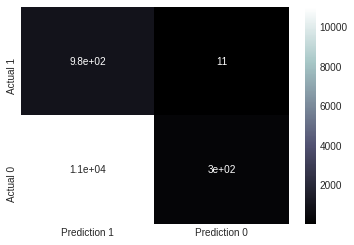

In [ ]:
svt_cm = confusion_matrix(y_test, pred_svt, labels = [1,0])
svt_cm_df = pd.DataFrame(data = svt_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(svt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
print(classification_report(y_test, pred_svt))

# Tuned Support Vector Machine Classifier algorithm gets Recall score 0.99 with 11 FN.

              precision    recall  f1-score   support

           0       0.96      0.03      0.05     11307
           1       0.08      0.99      0.15       994

    accuracy                           0.10     12301
   macro avg       0.52      0.51      0.10     12301
weighted avg       0.89      0.10      0.06     12301



In [ ]:
svt_cm_df


,Prediction 1,Prediction 0
Actual 1,983,11
Actual 0,11009,298


In [ ]:
rec_svt = pd.DataFrame({"Recall Score" : recall_score(y_test, pred_svt)}, 
                       index = ['Tuned SVC'])


tp_svt = svt_cm_df['Prediction 1'][0]
fp_svt = svt_cm_df['Prediction 1'][1]
fn_svt = svt_cm_df['Prediction 0'][0]
tn_svt = svt_cm_df['Prediction 0'][1]

In [ ]:
tuned_sv = grid_sv.best_estimator_

## Random Forest

In [ ]:
rf_t = RandomForestClassifier()
param_rf = {
    "n_estimators" : [10,25,50,100,500],
    "max_depth" : [1,2,8,15,20],
    "min_samples_leaf" : np.linspace(0.01, 0.2, 30),
}

grid_rf = RandomizedSearchCV(
    estimator = rf_t,
    param_distributions = param_rf,
    cv = 10,
    scoring = 'recall',
    refit = True,
    n_jobs = -1,
    verbose = 3,
    n_iter = 50
)

In [ ]:
grid_rf.fit(X_train_smote, y_train_smote)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.2min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
grid_rf.best_params_

# {'max_depth': 2, 'min_samples_leaf': 0.07, 'n_estimators': 30}
# Rec 0.42 | FN 576

# {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}
# Rec 0.01 | FN 987

# {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 500}
# Rec 0.01 | FN 987

# {'max_depth': 2, 'min_samples_leaf': 0.07, 'n_estimators': 100}
# Rec 0.44 | FN 553

{'max_depth': 2, 'min_samples_leaf': 0.01, 'n_estimators': 50}

In [ ]:
pred_rft = grid_rf.predict(X_test)

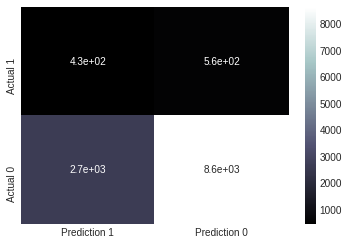

In [ ]:
rft_cm = confusion_matrix(y_test, pred_rft, labels = [1,0])
rft_cm_df = pd.DataFrame(data = rft_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(rft_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
print(classification_report(y_test, pred_rft))

# Tuned Random Forest Classifier algorithm gets Recall score 0.44 with 561 FN.

              precision    recall  f1-score   support

           0       0.94      0.76      0.84     11307
           1       0.14      0.44      0.21       994

    accuracy                           0.74     12301
   macro avg       0.54      0.60      0.53     12301
weighted avg       0.87      0.74      0.79     12301



In [ ]:
rft_cm_df


,Prediction 1,Prediction 0
Actual 1,433,561
Actual 0,2667,8640


In [ ]:
rec_rft = pd.DataFrame({"Recall Score" : recall_score(y_test, pred_rft)}, 
                       index = ['Tuned Random Forest'])


tp_rft = rft_cm_df['Prediction 1'][0]
fp_rft = rft_cm_df['Prediction 1'][1]
fn_rft = rft_cm_df['Prediction 0'][0]
tn_rft = rft_cm_df['Prediction 0'][1]

In [ ]:
tuned_rf = grid_rf.best_estimator_

## Xtreme Gradient Boosting

In [ ]:
xg_t = GradientBoostingClassifier()

param_xg = {
    "n_estimators" : [10, 20, 25, 30, 50, 100],
    "learning_rate" : np.linspace(0.01, 4, 20),
    "subsample" : [0.1, 0.5, 1, 4, 7]
}

grid_xg = RandomizedSearchCV(
    estimator = xg_t,
    param_distributions = param_xg,
    cv = 6,
    scoring = 'recall',
    refit = True,
    n_jobs = -1,
    verbose = 3,
    n_iter = 100
)

In [ ]:
grid_xg.fit(X_train_smote, y_train_smote)

Fitting 6 folds for each of 100 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 287 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.3min finished


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [ ]:
grid_xg.best_params_

# {'learning_rate': 3.58, 'n_estimators': 25, 'subsample': 1}
# Rec 0.78 | FN 223

{'learning_rate': 0.8500000000000001, 'n_estimators': 100, 'subsample': 1}

In [ ]:
pred_xgt = grid_xg.predict(X_test)

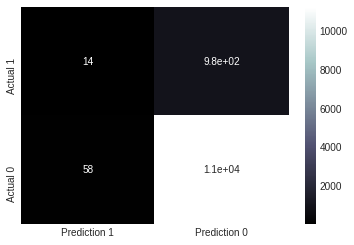

In [ ]:
xgt_cm = confusion_matrix(y_test, pred_xgt, labels = [1,0])
xgt_cm_df = pd.DataFrame(data = xgt_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(xgt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
print(classification_report(y_test, pred_xgt))

# Tuned XGBoost algorithm gets Recall score 0.01 with 980 FN.

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     11307
           1       0.19      0.01      0.03       994

    accuracy                           0.92     12301
   macro avg       0.56      0.50      0.49     12301
weighted avg       0.86      0.92      0.88     12301



In [ ]:
xgt_cm_df


,Prediction 1,Prediction 0
Actual 1,14,980
Actual 0,58,11249


In [ ]:
rec_xgt = pd.DataFrame({"Recall Score" : recall_score(y_test, pred_xgt)}, 
                       index = ['Tuned XGBoost'])


tp_xgt = xgt_cm_df['Prediction 1'][0]
fp_xgt = xgt_cm_df['Prediction 1'][1]
fn_xgt = xgt_cm_df['Prediction 0'][0]
tn_xgt = xgt_cm_df['Prediction 0'][1]

In [ ]:
tuned_xg = grid_xg.best_estimator_

# 11) Summary and Model Selection

## Summary

In [ ]:
model_summary = pd.concat([rec_lr, rec_lrt, rec_sv, rec_svt, 
                           rec_rf, rec_rft, rec_xg, rec_xgt])
model_summary


,Recall Score
Logistic Regression,0.614688
Tuned Logistic Regression,0.644869
SVC,0.916499
Tuned SVC,0.988934
Random Forest,0.013078
Tuned Random Forest,0.435614
XGBoost,0.006036
Tuned XGBoost,0.014085


In [ ]:
summary_cm = pd.DataFrame({
    "TruePositive" : [tp_lr, tp_lrt, tp_sv, tp_svt, tp_rf, tp_rft, tp_xg, tp_xgt],
    "TrueNegative" : [tn_lr, tn_lrt, tn_sv, tn_svt, tn_rf, tn_rft, tn_xg, tn_xgt],
    "FalsePositive": [fp_lr, fp_lrt, fp_sv, fp_svt, fp_rf, fp_rft, fp_xg, fp_xgt],
    "FalseNegative": [fn_lr, fn_lrt, fn_sv, fn_svt, fn_rf, fn_rft, fn_xg, fn_xgt]
}, 
index = model_summary.index)

summary_cm

# We see that the smallest FalseNegative is Tuned SVC with 11 FN.

,TruePositive,TrueNegative,FalsePositive,FalseNegative
Logistic Regression,611,7558,3749,383
Tuned Logistic Regression,641,6798,4509,353
SVC,911,2027,9280,83
Tuned SVC,983,298,11009,11
Random Forest,13,11291,16,981
Tuned Random Forest,433,8640,2667,561
XGBoost,6,11296,11,988
Tuned XGBoost,14,11249,58,980


## Export Model
We choose Tuned SVC with its variable `tuned_sv` and export it named `risk_TunedSV`.

In [ ]:
import joblib

In [ ]:
joblib.dump(tuned_sv, 'risk_TunedSV')

['risk_TunedSV']

# 12) Predict the Test Set File
We will predict the `app_test.csv` with our selected Model and find out what its Recall score.

But first, we have to preprocess the test set first so our model can reads and predicts.

In [ ]:
app_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Cermati.com/app_test.csv')
app_test.columns = [i.lower() for i in app_test.columns]                                            
app_test = app_test.drop(['unnamed: 0'], axis = 1)                                                  

In [ ]:
# for predicting purposes, we drop the rows which have null value.
app_test.dropna(inplace = True)

## Preprocessing

In [ ]:
## ENCODING

app_test['gender'] = app_test['gender'].map({
                                    'F' : 0,
                                    'M' : 1
                                })

app_test['education'] = app_test['education'].map({
                                         'Lower secondary' : 0,
                                         'Secondary / secondary special' : 1,
                                         'Incomplete higher' : 2,
                                         'Higher education' : 3,
                                         'Academic degree' : 4
                                      })

app_test['weekdays_apply'] = app_test['weekdays_apply'].map({
                                                   'MONDAY' : 1,
                                                   'TUESDAY' : 2,
                                                   'WEDNESDAY' : 3,
                                                   'THURSDAY' : 4,
                                                   'FRIDAY' : 5,
                                                   'SATURDAY' : 6,
                                                   'SUNDAY' : 7
                                                })

app_test = pd.get_dummies(app_test, columns = ['contract_type', 
                                     'income_type',
                                     'family_status',
                                     'housing_type']
)

app_test.drop(['ln_id', 'organization_type'], axis = 1, inplace = True)

## SELECT SAME FEATURES AS THE MODEL HAS LEARNED
feat_test = app_test[['ext_score_2', 'price', 'approved_credit',
       'housing_type_Rented apartment', 'housing_type_Office apartment',
       'gender', 'days_age', 'family_status_Widow', 'family_status_Married',
       'days_id_change', 'housing_type_Municipal apartment',
       'income_type_Working', 'contract_type_Cash loans',
       'contract_type_Revolving loans', 'housing_type_With parents',
       'income_type_State servant', 'education', 'income_type_Pensioner',
       'days_registration', 'annuity', 'family_status_Single / not married',
       'family_status_Civil marriage', 'housing_type_House / apartment',
       'num_children', 'hour_apply', 'income_type_Commercial associate',
       'income', 'target']]

In [ ]:
feat_test.head()

,ext_score_2,price,approved_credit,housing_type_Rented apartment,housing_type_Office apartment,gender,days_age,family_status_Widow,family_status_Married,days_id_change,housing_type_Municipal apartment,income_type_Working,contract_type_Cash loans,contract_type_Revolving loans,housing_type_With parents,income_type_State servant,education,income_type_Pensioner,days_registration,annuity,family_status_Single / not married,family_status_Civil marriage,housing_type_House / apartment,num_children,hour_apply,income_type_Commercial associate,income,target
2,0.686312,247500.0,247500.0,0,0,0,-18384,0,1,-1930,0,1,1,0,0,0,1,0,-8226.0,8887.5,0,0,1,1,12,0,90000.0,0
3,0.266520,418500.0,506889.0,0,0,1,-12170,0,1,-4048,0,1,1,0,0,0,1,0,-916.0,24781.5,0,0,1,2,13,0,112500.0,0
4,0.610483,450000.0,450000.0,0,0,1,-10790,0,1,-2035,0,1,1,0,0,0,2,0,-4640.0,21888.0,0,0,1,0,14,0,216000.0,0
5,0.067371,135000.0,135000.0,0,0,0,-10942,0,0,-3576,0,1,1,0,1,0,1,0,-3232.0,7321.5,1,0,0,0,10,0,58500.0,0
8,0.673492,477000.0,665892.0,0,0,0,-20625,0,1,-3743,0,0,1,0,0,0,1,1,-741.0,19210.5,0,0,1,0,13,0,112500.0,0


In [ ]:
# Splitting and Scaling

X_true = feat_test.drop('target', axis = 1)
y_true = feat_test['target']

X_true_sc = scaler_robust.transform(X_true)

## Predicting the Test Dataset

In [ ]:
pred_result = tuned_sv.predict(X_true_sc)

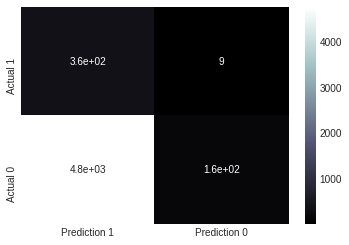

In [ ]:
res_cm = confusion_matrix(y_true, pred_result, labels = [1,0])
res_cm_df = pd.DataFrame(data = res_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(res_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
print(classification_report(y_true, pred_result))

# so our model has recall score 0.98 of 1.0 with 9 FN

              precision    recall  f1-score   support

           0       0.95      0.03      0.06      4914
           1       0.07      0.98      0.13       372

    accuracy                           0.10      5286
   macro avg       0.51      0.50      0.10      5286
weighted avg       0.89      0.10      0.07      5286



In [ ]:
res_cm_df

,Prediction 1,Prediction 0
Actual 1,363,9
Actual 0,4753,161


In [ ]:
# probability of 'no late in payment' (0 class)
proba_nolate = [i[0] for i in tuned_sv.predict_proba(X_true_sc)]

# New DataFrame to Show Loan Applicants' rank based on their Repayment Capability
applicants = app_test.drop('target', axis = 1)
applicants['probability_of_no_late_payment'] = proba_nolate
beneficial_applicant = applicants.sort_values(by = 'probability_of_no_late_payment', ascending = False)

In [ ]:
beneficial_applicant.head(10)

# from this dialog box, lenders can confidently choose the borrowers which they want to lend their money.
# Lenders will be assisted with the last column named 'probability of no late payment', it simply indicates how high borrowers' probability for no late payment
# higher the number is better.

,ln_id,contract_type,gender,num_children,income,approved_credit,annuity,price,income_type,education,family_status,housing_type,days_age,days_work,days_registration,days_id_change,weekdays_apply,hour_apply,organization_type,ext_score_1,ext_score_2,ext_score_3,probability_of_no_late_payment
11293,228135,Cash loans,M,2,864900.0,4050000.0,102384.0,4050000.0,Commercial associate,Higher education,Married,House / apartment,-14940,-632,-1272.0,-1265,THURSDAY,8,Business Entity Type 3,0.335628,0.280597,0.786267,0.810584
4381,216092,Revolving loans,F,1,1125000.0,1350000.0,67500.0,1350000.0,Commercial associate,Higher education,Single / not married,House / apartment,-14325,-3082,-769.0,-4071,MONDAY,19,Business Entity Type 3,0.605996,0.739501,0.644679,0.803649
13540,407999,Cash loans,M,1,1170000.0,983299.5,41661.0,904500.0,Working,Higher education,Married,House / apartment,-16163,-397,-10263.0,-778,THURSDAY,16,Business Entity Type 3,0.682433,0.367193,0.119119,0.800271
11611,288105,Cash loans,M,0,1125000.0,630099.0,67990.5,598500.0,Working,Incomplete higher,Married,House / apartment,-10730,-2577,-1457.0,-3205,WEDNESDAY,2,Self-employed,0.333850,0.661588,0.513694,0.795607
12095,309128,Cash loans,F,0,303750.0,3150000.0,113557.5,3150000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-13819,-857,-7856.0,-5290,MONDAY,16,Business Entity Type 3,0.467887,0.806679,0.617826,0.776068
14041,170181,Cash loans,F,1,900000.0,1928304.0,79708.5,1800000.0,Working,Higher education,Married,House / apartment,-11685,-4543,-5314.0,-1611,FRIDAY,11,Business Entity Type 2,0.826694,0.511890,0.326475,0.773673
2680,132486,Revolving loans,F,2,900000.0,675000.0,33750.0,675000.0,Commercial associate,Higher education,Married,House / apartment,-16279,-747,-4104.0,-4420,TUESDAY,19,Other,0.631594,0.788023,0.651260,0.761681
13478,436620,Cash loans,M,0,675000.0,1692000.0,87741.0,1692000.0,Commercial associate,Higher education,Single / not married,House / apartment,-13685,-4625,-419.0,-4554,WEDNESDAY,11,Business Entity Type 3,0.633446,0.116035,0.380800,0.730258
823,164541,Cash loans,F,0,675000.0,1187370.0,112297.5,1125000.0,Working,Higher education,Single / not married,House / apartment,-18406,-733,-1304.0,-1916,FRIDAY,10,Self-employed,0.403133,0.513251,0.800451,0.725358
13213,385281,Cash loans,M,2,810000.0,1288350.0,41692.5,1125000.0,State servant,Higher education,Married,House / apartment,-15808,-4682,-2353.0,-3403,FRIDAY,18,Police,0.633850,0.737143,0.329655,0.713584


# 13) Conclusions
### A. Exploratory Data Analysis
  1. In this financial platform, there are 92% applicants who aren't late in payment and 8% are late, which means good for the company's sustainability actually.
  2. 90.6% of applicant loans have 'cash loans' contract type while the other 9.4% are revolving.
  3. Applicants who has Cash Loan contract and don't late in payment, have average credit about 631,991, while they who late in payment have average credit about 563,142.
  4. When it comes to annuity, cash loans type has slightly difference between late payment and not. Most applicants who do not late in payment have average annuity around 28,316, while applicants who late in payment have average annuity about 27,020.
  5. In income type, they're seem fine because the proportion of target still dominated by applicants who do not late in payment. When it comes to income type, applicants who has income type like student and businessman are clean, they are all don't late in payment.
  6. Meanwhile we see that unemployed applicants who late in payment has higher annuity compare to they who don't late in payment. Unemployed applicants who late in payment have average annuity around 38,839.5, while they who don't late in payment have average annuity around 31,017.38.
  7. Unemployed applicants who late in payment has average credit around 1,215,000.0 . This is the highest average credit between the other income type, while they who don't late in payment has average credit around 875,250.0.
  8. Contrastly, we can know that education matters in this case of payment. Notice to 'lower secondary' and 'incomplete higher education' are tend to late in payment, while applicants who have academic degree are likely to not late in payment eventhough they have the highest average of annuity around 33,529.
  9. Applicants who have children between 5 and 9 children tend to late in payment. Number of children matters.

### B. Machine Learning Model
  10. While there are many methods to select features, we used LogisticRegression's coefficients and get the most independent variables which affects the target. From range 0 to 1, we get top 3 important features. There are ext_score_2 (0.865), gender (0.435), and price (0.368).
  11. Since this is an imbalance dataset, we can't use accuracy but Recall. Why? We will go to minimze FN, because it would be a great loss for Lender if our model says the borrower is no late in payment but actually the borrower is late in payment. Lender's money will leave away and have no return for him. Since he won't get the return, we can't have service fee from lenders.
    - FP = Model predicts 'late payment' while the actual is not late.
    - FN = Model predicts 'no late payment' while the actual is late.
  12. From all models, we select **Tuned SVC** to be our model because it has the highest recall score: 0.9889 with 11 FN. With this model, lenders can minimize their risk to pick the debtors who'll late in payment because the chance that model will predicts wrongly is only about 0.09% `(FN/(FN + FP)x100%)`. This will mitigate the loss and off course lenders can choose borrowers without doubt.
  13. Using the `app_test.csv`, the model predicts well with recall score 0.98 with 9 FN.